<div style="text-align:center;">
    
#### *"Just as a mother anticipates the needs of her child,<br>let us learn to anticipate Earth's energy needs — with care, foresight, and responsibility."*
</div>

<div style="text-align:center;">
    
### <span style="color:forestgreen; font-weight:bold;">*Forecasting Energy Demand: A Sustainability Quest through Machine Learning*</span>
<img src="../Images/Energy-Efficiency.png" alt="ECP" style="width: 600px;">
</div>

<div style="text-align: justify; font-size: 15px; line-height: 1.6;">
    Meet <span style="font-weight:600;"><i>Alex</i></span> and <span style="font-weight:600;"><i>Sophie</i></span> — two passionate minds on a mission to <span style="font-weight:600;">reshape the way we understand and consume energy.</span> Concerned about <span style="font-weight:600;">rising demands, unpredictable consumption patterns, and the environmental toll of inefficiency</span>, they’ve envisioned a smarter, cleaner energy future.<br><br> 
    
As they navigate the complex world of data, carbon emissions, and optimization, we step into their story — not just as observers, but as data-driven allies. <span style="font-weight:600;">Our project brings the power of machine learning, energy analytics, and sustainability insights to support their mission.</span>
With a focus on accurate energy demand forecasting, carbon footprint reduction, and actionable recommendations,  <span style="font-weight:600;">We aim to build a model that goes beyond prediction — it informs decisions, drives sustainability, and empowers meaningful change.</span>

Because in a world where <span style="font-weight:600;color:forestgreen;">*salaries may increase, the planet's resources do not*</span>, we must remember: economic growth must be balanced with ecological responsibility. That’s why we choose to value access over excess — rethinking our consumption patterns to reflect a future rooted in sustainability and shared responsibility.Together with Alex and Sophie, we embark on a journey where every data point contributes to <span style="font-weight:600;color:forestgreen;">*a greener tomorrow*</span>.

</div>


<h3 style="color:#007BA7;">📊 Data Sources</h3>


<div style="text-align: justify; font-size: 15px; line-height: 1.6;">
For this project, we have utilized real-time <span style="font-weight:600;">energy consumption</span> and <span style="font-weight:600;">weather data</span> sourced from credible and authoritative platforms.<br>

The energy usage statistics were collected from <span style="color:#007acc; text-decoration: underline;">https://iced.niti.gov.in/energy/electricity/distribution/national-level-consumption/load-curve</span>, Copyright © 2025, NITI Aayog. While the platform primarily relies on official sources, in certain instances, some assumptions have been made or data has been derived. These details are mentioned explicitly within the platform. Although we believe the data to be reliable and sufficiently comprehensive, NITI Aayog ICED does not guarantee absolute accuracy and accepts no liability for consequences arising from the use of this information.<br>

Complementing this, the weather data — including variables such as temperature, humidity, and solar radiation — was obtained from <span style="color:#007acc; text-decoration: underline;">https://www.visualcrossing.com/weather-query-builder/</span>, ensuring both temporal precision and contextual relevance.<br>

The combined dataset spans from <span style="font-weight:600;">January 2023 to April 2024</span>, offering a robust 15-month window that captures seasonal variations and demand patterns across different weather conditions. By integrating these datasets, we aim to effectively capture the dynamic relationship between environmental factors and energy consumption — paving the way for smarter forecasting models and sustainability-driven insights.
</div>


<div style="background-color:#fcf3cf; padding:14px; border-radius:8px;">
<h3 style="margin:0; color:#7D6608;">💡 Step 1: Data Loading and Initial Inspection</h3>
</div>

<div style="text-align: justify; font-size: 15px; line-height: 1.6;">

To begin our analysis, we load the <span style="font-weight:600;">energy consumption</span> and <span style="font-weight:600;">weather datasets</span> into our environment. These datasets form the foundation of our forecasting model, enabling us to explore the structure of the data, understand its composition, and prepare it for further analysis.

Since both datasets contain temporal information, we also perform a <span style="font-weight:600;">dataset merge based on the timestamp</span> to align energy demand with corresponding environmental conditions. This merged dataset allows us to capture meaningful relationships between consumption patterns and external factors such as temperature, humidity, and solar radiation.

By conducting an initial inspection, we can identify trends, detect anomalies, and plan appropriate preprocessing steps that will ensure the reliability and accuracy of our downstream modeling process.

</div>



#### Importing required libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# to view all the columns of the DataFrame
pd.pandas.set_option('display.max_columns',None)

<h4>👀 First Impressions of the Data</h4>

In [2]:
# Load the datasets
energy_data = pd.read_csv('Energy demand profile.csv')  
weather_data = pd.read_csv('Weather history.csv')  

# Display first 5 rows of both the datasets
print("Energy Data Sample:")
display(energy_data.head())

print("\nWeather Data Sample:")
display(weather_data.head())

Energy Data Sample:


Year         Date  Hourly Demand Met (in MW)
0  2023  01-Jan 12am                  138212.80
1  2023   01-Jan 1am                  134620.74
2  2023   01-Jan 2am                  131384.79
3  2023   01-Jan 3am                  130602.47
4  2023   01-Jan 4am                  133288.97


Weather Data Sample:


name             datetime  temp  feelslike   dew  humidity  precip  \
0  india  2023-01-01T00:00:00  11.0       11.0  10.0     93.55     0.0   
1  india  2023-01-01T01:00:00  10.0        9.6   9.0     93.50     0.0   
2  india  2023-01-01T02:00:00   8.6        8.6   7.6     93.83     0.0   
3  india  2023-01-01T03:00:00  10.0       10.0   9.0     93.50     0.0   
4  india  2023-01-01T04:00:00   9.0        8.5   9.0    100.00     0.0   

   precipprob preciptype  snow  snowdepth  windgust  windspeed  winddir  \
0           0        NaN     0          0      13.0        5.4    250.0   
1           0        NaN     0          0      13.3        5.4    250.0   
2           0        NaN     0          0      13.3        0.0    282.1   
3           0        NaN     0          0      13.7        0.0      0.0   
4           0        NaN     0          0      12.2        5.4    270.0   

   sealevelpressure  cloudcover  visibility  solarradiation  solarenergy  \
0            1020.0         0.0         2.0             0.0          0.0   
1            1020.0         0.0         2.0             0.0          0.0   
2            1019.5         0.0         1.2             0.0          0.0   
3            1019.0         0.0         2.0             0.0          0.0   
4            1019.0         0.0         1.0             0.0          0.0   

   uvindex  severerisk conditions         icon                      stations  
0        0         NaN      Clear  clear-night              VIDP,42181099999  
1        0         NaN      Clear  clear-night              VIDP,42181099999  
2        0         NaN      Clear  clear-night  42182099999,VIDP,42181099999  
3        0         NaN      Clear  clear-night              VIDP,42181099999  
4        0         NaN      Clear  clear-night              VIDP,42181099999

#### Checking the datatypes

In [3]:
# Check basic info
print("Energy Data Info:")
energy_data.info()

print("\nWeather Data Info:")
weather_data.info()

Energy Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11664 entries, 0 to 11663
Data columns (total 3 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year                       11664 non-null  int64  
 1   Date                       11664 non-null  object 
 2   Hourly Demand Met (in MW)  11664 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 273.5+ KB

Weather Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11664 entries, 0 to 11663
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              11664 non-null  object 
 1   datetime          11664 non-null  object 
 2   temp              11664 non-null  float64
 3   feelslike         11664 non-null  float64
 4   dew               11664 non-null  float64
 5   humidity          11664 non-null  float64
 6   precip            11

#### Shape of the datasets: No. of Records and No. of columns in each dataset

In [4]:
print("Shape of Energy_Consumption data: ", energy_data.shape)
print("Shape of Weather_data           : ", weather_data.shape)

Shape of Energy_Consumption data:  (11664, 3)
Shape of Weather_data           :  (11664, 24)


Both the energy consumption and weather datasets contain the same number of records, indicating they are time-aligned and suitable for merging on the datetime column.

<div style="background-color:#e6f0fa; padding:14px; border-radius:8px;">
<h3 style="margin:0; color:#154360;">🔗 Step 2: Merging Energy and Weather Datasets</h3>
</div>

<div style="text-align: justify; font-size: 14px; line-height: 1.6;">
To build a unified dataset for forecasting, we merge the energy consumption and weather data on the <span style="font-weight:600;">datetime</span> column. This allows us to align hourly energy demand with corresponding weather conditions — providing a more contextual and comprehensive dataset for analysis.
</div>


<div style="background-color:#fff5e6; padding:12px; border-radius:8px; font-size:14px; line-height:1.6;">
⚠️ <b>Note:</b> Before merging, ensure the <b>datetime</b> columns in both datasets are correctly formatted and aligned. This includes parsing separate <b>year</b> and <b>Date</b> fields in the energy data into a single datetime object that matches the format of the weather dataset.
</div>


In [5]:
# Step 1: Combine 'year' and 'Date' columns of the energy_data to create a proper datetime field
energy_data['full_datetime'] = energy_data['Year'].astype(str) + ' ' + energy_data['Date'].astype(str)

# Step 2: Convert the combined string to datetime format
energy_data['datetime'] = pd.to_datetime(energy_data['full_datetime'], format='%Y %d-%b %I%p')

# Step 3: Drop the temporary columns as they're no longer needed
energy_data.drop(columns=['full_datetime','Year', 'Date'], inplace=True)

# Step 4: Convert weather_data's 'datetime' column to proper datetime format
weather_data['datetime'] = pd.to_datetime(weather_data['datetime'])

# Step 5: Merge energy and weather data on the 'datetime' column
merged_data = pd.merge(energy_data, weather_data, on='datetime', how='inner')

# Step 6: Check the merged data
print("Merged Data Info:")
merged_data.info()

Merged Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11664 entries, 0 to 11663
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Hourly Demand Met (in MW)  11664 non-null  float64       
 1   datetime                   11664 non-null  datetime64[ns]
 2   name                       11664 non-null  object        
 3   temp                       11664 non-null  float64       
 4   feelslike                  11664 non-null  float64       
 5   dew                        11664 non-null  float64       
 6   humidity                   11664 non-null  float64       
 7   precip                     11664 non-null  float64       
 8   precipprob                 11664 non-null  int64         
 9   preciptype                 199 non-null    object        
 10  snow                       11664 non-null  int64         
 11  snowdepth                  11664 non-null  int64 

In [6]:
merged_data.head()

Hourly Demand Met (in MW)            datetime   name  temp  feelslike  \
0                  138212.80 2023-01-01 00:00:00  india  11.0       11.0   
1                  134620.74 2023-01-01 01:00:00  india  10.0        9.6   
2                  131384.79 2023-01-01 02:00:00  india   8.6        8.6   
3                  130602.47 2023-01-01 03:00:00  india  10.0       10.0   
4                  133288.97 2023-01-01 04:00:00  india   9.0        8.5   

    dew  humidity  precip  precipprob preciptype  snow  snowdepth  windgust  \
0  10.0     93.55     0.0           0        NaN     0          0      13.0   
1   9.0     93.50     0.0           0        NaN     0          0      13.3   
2   7.6     93.83     0.0           0        NaN     0          0      13.3   
3   9.0     93.50     0.0           0        NaN     0          0      13.7   
4   9.0    100.00     0.0           0        NaN     0          0      12.2   

   windspeed  winddir  sealevelpressure  cloudcover  visibility  \
0        5.4    250.0            1020.0         0.0         2.0   
1        5.4    250.0            1020.0         0.0         2.0   
2        0.0    282.1            1019.5         0.0         1.2   
3        0.0      0.0            1019.0         0.0         2.0   
4        5.4    270.0            1019.0         0.0         1.0   

   solarradiation  solarenergy  uvindex  severerisk conditions         icon  \
0             0.0          0.0        0         NaN      Clear  clear-night   
1             0.0          0.0        0         NaN      Clear  clear-night   
2             0.0          0.0        0         NaN      Clear  clear-night   
3             0.0          0.0        0         NaN      Clear  clear-night   
4             0.0          0.0        0         NaN      Clear  clear-night   

                       stations  
0              VIDP,42181099999  
1              VIDP,42181099999  
2  42182099999,VIDP,42181099999  
3              VIDP,42181099999  
4              VIDP,42181099999

In [7]:
merged_data.tail()

Hourly Demand Met (in MW)            datetime   name  temp  feelslike  \
11659                  201094.24 2024-04-30 19:00:00  india  32.0       29.8   
11660                  196577.71 2024-04-30 20:00:00  india  29.6       28.3   
11661                  194782.12 2024-04-30 21:00:00  india  30.0       28.2   
11662                  194967.39 2024-04-30 22:00:00  india  29.0       27.5   
11663                  194194.45 2024-04-30 23:00:00  india  26.5       26.5   

        dew  humidity  precip  precipprob preciptype  snow  snowdepth  \
11659  -3.0     10.32     0.0           0        NaN     0          0   
11660   9.6     28.78     0.0           0        NaN     0          0   
11661   4.0     19.18     0.0           0        NaN     0          0   
11662   4.0     20.32     0.0           0        NaN     0          0   
11663  10.6     36.87     0.0           0        NaN     0          0   

       windgust  windspeed  winddir  sealevelpressure  cloudcover  visibility  \
11659      31.3       11.2    280.0            1004.0         0.0         4.0   
11660      20.9        2.0    270.0            1002.6         0.0         4.0   
11661      17.6        5.4    290.0            1004.0         0.0         4.0   
11662      15.5        3.6    264.9            1004.0         0.0         4.0   
11663      13.3        0.0      0.0            1002.3         0.0         3.8   

       solarradiation  solarenergy  uvindex  severerisk conditions  \
11659           130.6          0.5        0         NaN      Clear   
11660             6.5          0.0        0         NaN      Clear   
11661             0.0          0.0        0         NaN      Clear   
11662             0.0          0.0        0         NaN      Clear   
11663             0.0          0.0        0         NaN      Clear   

              icon                      stations  
11659  clear-night              VIDP,42181099999  
11660  clear-night  42182099999,VIDP,42181099999  
11661  clear-night              VIDP,42181099999  
11662  clear-night              VIDP,42181099999  
11663  clear-night  42182099999,VIDP,42181099999

In [8]:
merged_data.shape

(11664, 25)

In [9]:
# Save the merged_data
merged_data.to_csv('merged_data.csv',index = False)

# Rename for simpler reference
dataset = merged_data.copy()

To streamline future operations, we saved the merged dataset as <code>merged_data.csv</code>.  
The DataFrame has also been renamed to <code>dataset</code> for consistency and ease of reference in the subsequent analysis steps.

<div style="background-color:#e6f0fa; padding:14px; border-radius:8px;">
<h3 style="margin:0; color:#154360;">🔍 Step 3: Preliminary Data Inspection</h3>
</div>

<div style="text-align: justify; font-size: 14px; line-height: 1.6;">
Following the merge of the energy and weather datasets, we begin with a structural assessment of the unified dataset. This step helps us understand the overall composition and quality of the data before proceeding to cleaning and modeling. We examine feature types, generate summary statistics, check for missing values, and evaluate feature uniqueness and duplication.

These observations provide the necessary context for informed preprocessing decisions, ensuring our dataset is both reliable and efficient for downstream tasks such as feature engineering and machine learning.
</div>
<div style="font-size: 14px; line-height: 1.6;">
<b>Subsections in this stage:</b><br>
3.1 Identifying Numerical vs. Categorical Features<br>
3.2 Summary Statistics of Numerical Features<br>
3.3 Checking for Missing Values<br>
3.4 Checking for Unique Values<br>
3.5 Checking for Duplicate Records
</div>


#### 3.1 Identifying Numerical vs. Categorical Features

In [10]:
# define numerical & categorical columns
numeric_features = [feature for feature in dataset.columns if dataset[feature].dtypes != 'O']
categorical_features = [feature for feature in dataset.columns if dataset[feature].dtypes == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 20 numerical features : ['Hourly Demand Met (in MW)', 'datetime', 'temp', 'feelslike', 'dew', 'humidity', 'precip', 'precipprob', 'snow', 'snowdepth', 'windgust', 'windspeed', 'winddir', 'sealevelpressure', 'cloudcover', 'visibility', 'solarradiation', 'solarenergy', 'uvindex', 'severerisk']

We have 5 categorical features : ['name', 'preciptype', 'conditions', 'icon', 'stations']


#### 3.2 Basic Statistics Summary of the dataset

In [11]:
dataset.describe()

Hourly Demand Met (in MW)             datetime          temp  \
count               11664.000000                11664  11664.000000   
mean               181536.094420  2023-08-31 23:30:00     23.674048   
min                117602.110000  2023-01-01 00:00:00      4.000000   
25%                168523.135000  2023-05-02 11:45:00     17.400000   
50%                184053.645000  2023-08-31 23:30:00     25.000000   
75%                195973.955000  2023-12-31 11:15:00     30.000000   
max                237361.970000  2024-04-30 23:00:00     44.000000   
std                 19967.405263                  NaN      7.949271   

          feelslike           dew      humidity        precip    precipprob  \
count  11664.000000  11664.000000  11664.000000  11664.000000  11664.000000   
mean      24.935537     15.005204     64.225615      0.085415      1.620370   
min        2.100000     -8.000000      7.400000      0.000000      0.000000   
25%       17.400000     10.000000     44.560000      0.000000      0.000000   
50%       25.000000     14.000000     66.780000      0.000000      0.000000   
75%       32.200000     20.000000     85.980000      0.000000      0.000000   
max       48.700000     30.000000    100.000000     85.391000    100.000000   
std        9.620110      6.880984     24.231019      1.586976     12.626365   

          snow  snowdepth      windgust     windspeed       winddir  \
count  11664.0    11664.0  11664.000000  11664.000000  11664.000000   
mean       0.0        0.0     17.302263      6.761797    176.480316   
min        0.0        0.0      1.800000      0.000000      0.000000   
25%        0.0        0.0     11.200000      2.000000     67.000000   
50%        0.0        0.0     15.500000      7.200000    230.000000   
75%        0.0        0.0     22.300000      9.400000    271.000000   
max        0.0        0.0     66.600000     63.500000    360.000000   
std        0.0        0.0      8.103169      5.098887    117.315789   

       sealevelpressure    cloudcover    visibility  solarradiation  \
count      11664.000000  11664.000000  11585.000000    11664.000000   
mean        1010.943570     37.916041      2.638032      215.819067   
min          993.900000      0.000000      0.000000        0.000000   
25%         1005.500000      0.000000      2.000000        0.000000   
50%         1011.400000     29.200000      2.300000        8.000000   
75%         1017.000000     60.800000      4.000000      435.425000   
max         1027.000000    100.000000     24.100000     1016.700000   
std            6.595777     35.293297      1.527083      289.945295   

        solarenergy       uvindex   severerisk  
count  11664.000000  11664.000000  1464.000000  
mean       0.776457      2.130487     9.865437  
min        0.000000      0.000000     3.000000  
25%        0.000000      0.000000    10.000000  
50%        0.000000      0.000000    10.000000  
75%        1.600000      4.000000    10.000000  
max        3.700000     10.000000    30.000000  
std        1.044161      2.920587     1.631142

#### 3.3 Checking for Missing Values

We examine the presence and distribution of missing values within the dataset. This allows us to identify potentially incomplete features and guides our decisions in the upcoming data cleaning phase. A visual representation is also provided to better understand missing data patterns.

In [12]:
# Check for missing values
print("Missing values per column:")
print(merged_data.isnull().sum())

Missing values per column:
Hourly Demand Met (in MW)        0
datetime                         0
name                             0
temp                             0
feelslike                        0
dew                              0
humidity                         0
precip                           0
precipprob                       0
preciptype                   11465
snow                             0
snowdepth                        0
windgust                         0
windspeed                        0
winddir                          0
sealevelpressure                 0
cloudcover                       0
visibility                      79
solarradiation                   0
solarenergy                      0
uvindex                          0
severerisk                   10200
conditions                       0
icon                             0
stations                         0
dtype: int64


In [13]:
# Here we will check the percentage of NaN values present in each feature.
# Total missing values per column
missing_values = dataset.isnull().sum()

# Percentage of missing values
missing_percent = (missing_values / len(dataset)) * 100

# Combine into one DataFrame
missing_summary = pd.DataFrame({
    'Missing Values': missing_values,
    'Missing %': missing_percent.round(2)
}).sort_values(by='Missing %', ascending=False)

missing_summary


Missing Values  Missing %
preciptype                          11465      98.29
severerisk                          10200      87.45
visibility                             79       0.68
Hourly Demand Met (in MW)               0       0.00
windspeed                               0       0.00
icon                                    0       0.00
conditions                              0       0.00
uvindex                                 0       0.00
solarenergy                             0       0.00
solarradiation                          0       0.00
cloudcover                              0       0.00
sealevelpressure                        0       0.00
winddir                                 0       0.00
windgust                                0       0.00
datetime                                0       0.00
snowdepth                               0       0.00
snow                                    0       0.00
precipprob                              0       0.00
precip                                  0       0.00
humidity                                0       0.00
dew                                     0       0.00
feelslike                               0       0.00
temp                                    0       0.00
name                                    0       0.00
stations                                0       0.00

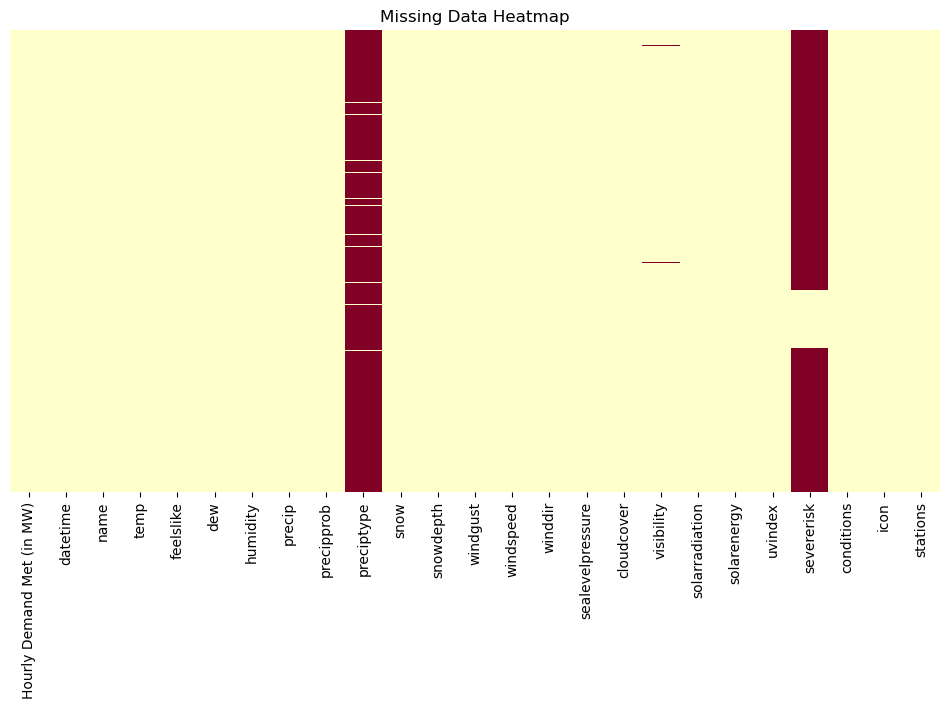

In [14]:
# Set the figure size
plt.figure(figsize=(12, 6))

# Heatmap of missing values
sns.heatmap(dataset.isnull(), 
            cbar=False, 
            cmap='YlOrRd',
            yticklabels=False)
plt.title("Missing Data Heatmap")
plt.show()


In [15]:
pip install missingno

<Axes: >

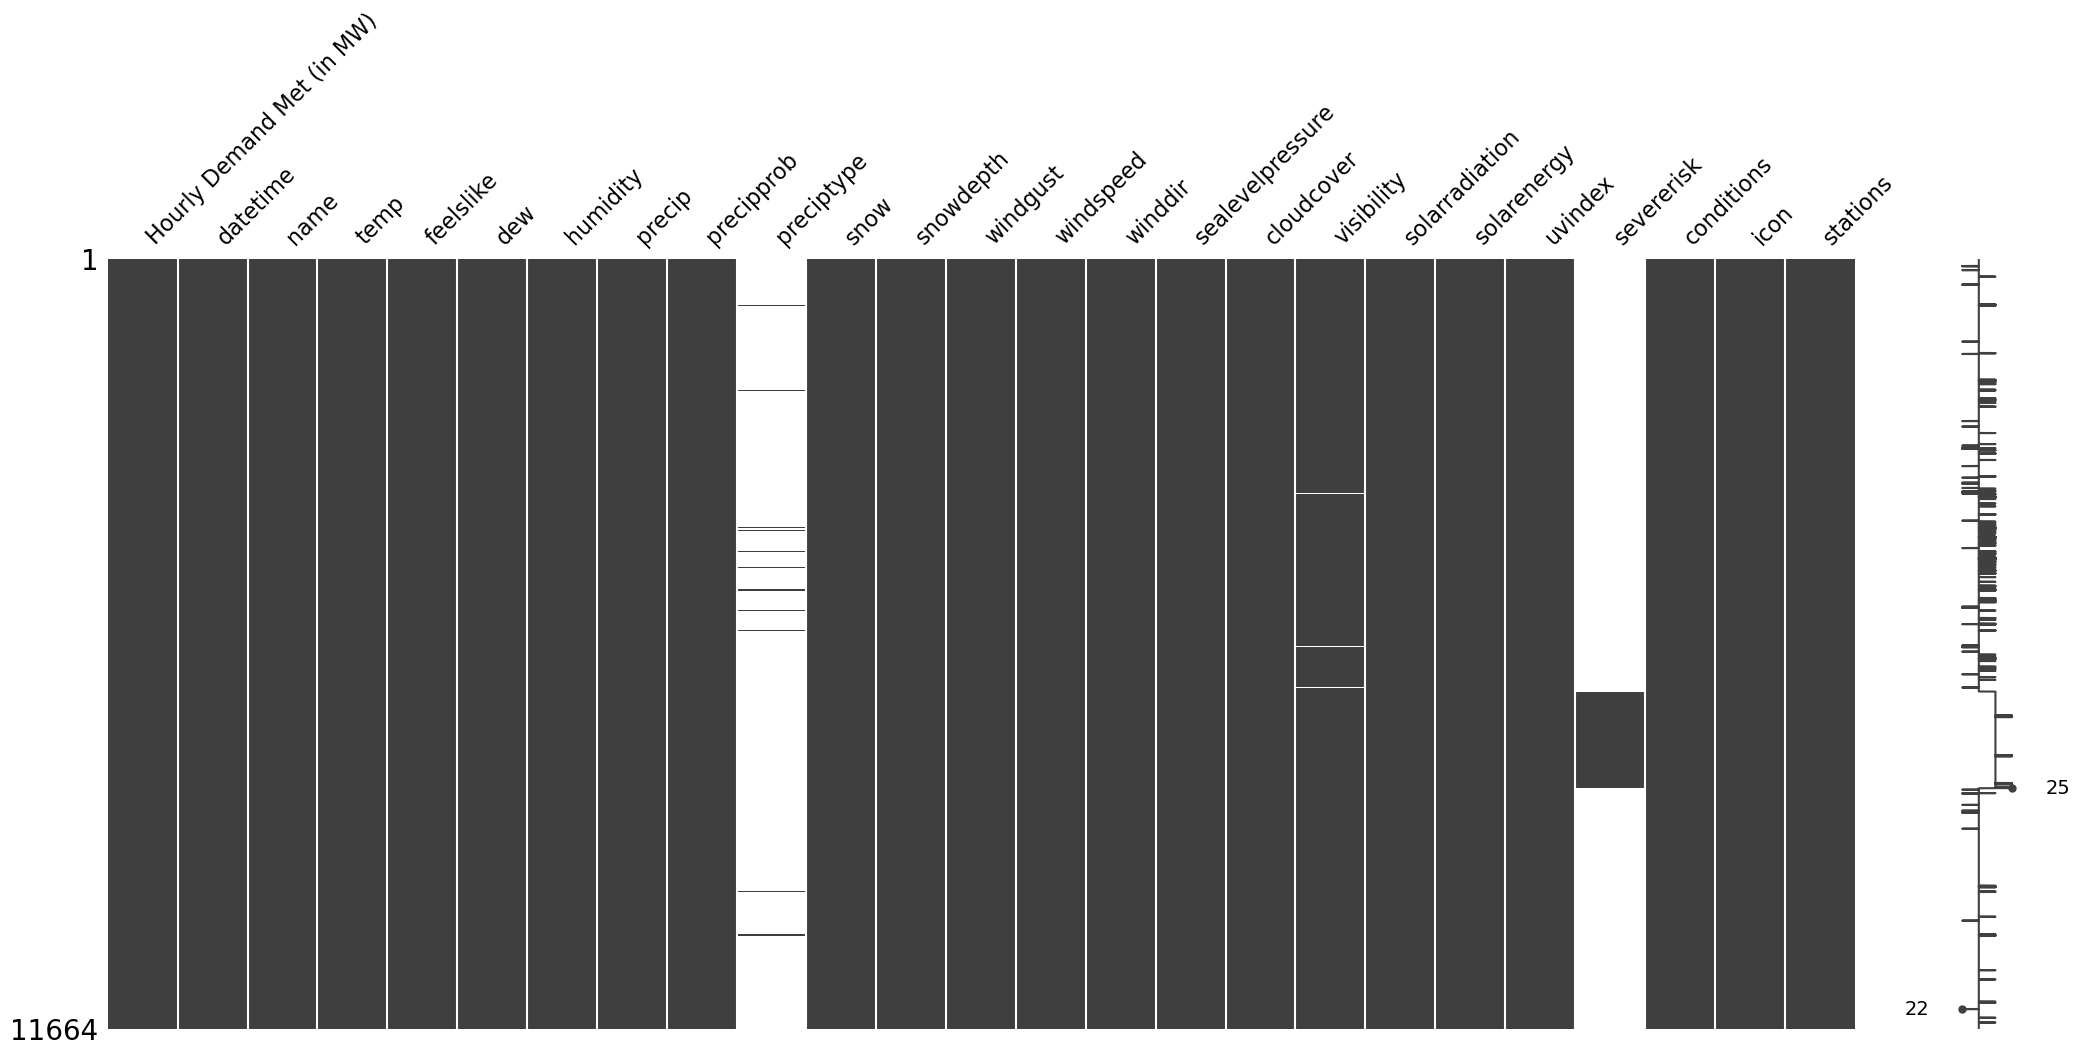

In [16]:
import missingno as msno

msno.matrix(dataset)

#### 3.4 Checking number of unique values of each feature

In [20]:
dataset.nunique()

Hourly Demand Met (in MW)    11647
datetime                     11664
name                             2
temp                           361
feelslike                      442
dew                            281
humidity                      3608
precip                         127
precipprob                       2
preciptype                       1
snow                             1
snowdepth                        1
windgust                       137
windspeed                      225
winddir                        724
sealevelpressure               298
cloudcover                     471
visibility                      58
solarradiation                4312
solarenergy                     38
uvindex                         11
severerisk                       4
conditions                       5
icon                             8
stations                        22
dtype: int64

#### 3.5 Checking for Duplicates

In [21]:
dataset.duplicated().sum()

0

That means, there are no duplicate values in the dataset.

<div style="background-color:#f0f8ff; padding:14px; border-radius:8px;">
<h3 style="margin:0; color:#154360;">📊 Step 4: Exploratory Data Analysis (EDA)</h3>
</div>

<div style="text-align: justify; font-size: 14px; line-height: 1.7; background-color:#f0f8ff; padding:10px; border-radius:6px;">
Exploratory Data Analysis (EDA) is a crucial phase where we uncover hidden patterns, detect anomalies, and assess relationships between variables using both statistical summaries and visualizations. This step lays the groundwork for intelligent preprocessing, feature engineering, and model development.

Through descriptive techniques and graphical tools, we explore feature distributions, spot outliers, analyze temporal trends, and evaluate correlations to better understand how the data behaves and interacts with the target variable.
</div>

<br>

<div style="font-size: 14px; line-height: 1.6; background-color:#f0f8ff; padding:10px; border-radius:6px;">
<b>Subsections in this stage:</b><br>
4.1 Summary Statistics and Missing Value Overview<br>
4.2 Distribution of Numerical Features<br>
4.3 Distribution Patterns – Visualizing skewness and normality using histograms or KDE plots.<br>
4.4 Outlier Detection Using Boxplots<br>
4.5 Correlation Heatmap and Feature Interactions<br>
4.6 Identification and Cardinality of Categorical Features<br>
4.7 Relationship Between Features and Target (Hourly Demand Met (in MW))<br>
4.8 Temporal Trends in Energy Consumption (Hourly, Daily, Monthly)<br>
</div>

Let's first import the visualization libraries 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
dataset = pd.read_csv('merged_data.csv')

# <span style="background-color:#FFD700;color:white;padding:5px;">Summary Statistics</span>

Summary statistics provide a concise summary of the central tendencies, spread, and shape of the data distribution. This analysis helps to:
- **Understand key metrics** like mean, median, mode, variance, and standard deviation for both numerical and categorical features.
- **Identify the range** (min and max) of the features to understand the spread.
- **Get a quick sense** of data distribution and the presence of outliers.
- **Detect skewness and kurtosis**, which can impact the assumptions of modeling algorithms.

In this section, we will calculate and present key summary statistics for all relevant features in the dataset.


In [3]:
# Summary stats
display(dataset.describe())

Hourly Demand Met (in MW)          temp     feelslike           dew  \
count               11664.000000  11664.000000  11664.000000  11664.000000   
mean               181536.094420     23.674048     24.935537     15.005204   
std                 19967.405263      7.949271      9.620110      6.880984   
min                117602.110000      4.000000      2.100000     -8.000000   
25%                168523.135000     17.400000     17.400000     10.000000   
50%                184053.645000     25.000000     25.000000     14.000000   
75%                195973.955000     30.000000     32.200000     20.000000   
max                237361.970000     44.000000     48.700000     30.000000   

           humidity        precip    precipprob     snow  snowdepth  \
count  11664.000000  11664.000000  11664.000000  11664.0    11664.0   
mean      64.225615      0.085415      1.620370      0.0        0.0   
std       24.231019      1.586976     12.626365      0.0        0.0   
min        7.400000      0.000000      0.000000      0.0        0.0   
25%       44.560000      0.000000      0.000000      0.0        0.0   
50%       66.780000      0.000000      0.000000      0.0        0.0   
75%       85.980000      0.000000      0.000000      0.0        0.0   
max      100.000000     85.391000    100.000000      0.0        0.0   

           windgust     windspeed       winddir  sealevelpressure  \
count  11664.000000  11664.000000  11664.000000      11664.000000   
mean      17.302263      6.761797    176.480316       1010.943570   
std        8.103169      5.098887    117.315789          6.595777   
min        1.800000      0.000000      0.000000        993.900000   
25%       11.200000      2.000000     67.000000       1005.500000   
50%       15.500000      7.200000    230.000000       1011.400000   
75%       22.300000      9.400000    271.000000       1017.000000   
max       66.600000     63.500000    360.000000       1027.000000   

         cloudcover    visibility  solarradiation   solarenergy       uvindex  \
count  11664.000000  11585.000000    11664.000000  11664.000000  11664.000000   
mean      37.916041      2.638032      215.819067      0.776457      2.130487   
std       35.293297      1.527083      289.945295      1.044161      2.920587   
min        0.000000      0.000000        0.000000      0.000000      0.000000   
25%        0.000000      2.000000        0.000000      0.000000      0.000000   
50%       29.200000      2.300000        8.000000      0.000000      0.000000   
75%       60.800000      4.000000      435.425000      1.600000      4.000000   
max      100.000000     24.100000     1016.700000      3.700000     10.000000   

        severerisk  
count  1464.000000  
mean      9.865437  
std       1.631142  
min       3.000000  
25%      10.000000  
50%      10.000000  
75%      10.000000  
max      30.000000

<div style="text-align:justify;background-color:#fcf8e3; padding:14px; border-left:5px solid #f0ad4e; border-radius:6px; font-size:14px; line-height:1.6;">
<b>📌 Insights from Summary Statistics:</b><br><br>

- Energy demand varies widely across the year, with a mean of ~181,500 MW and a range of over 100,000 MW.
- Several features (e.g., `solarradiation`, `windgust`, `precip`) are <span style="font-weight:600;">highly skewed</span>, with large gaps between median and max values — making them suitable candidates for <span style="font-weight:600;">log transformation</span>.
- Features like `feelslike`, `solarenergy`, and `snowdepth` are <span style="font-weight:600;">redundant, highly correlated, or uninformative</span>, and may be <span style="font-weight:600;">dropped or consolidated during feature pruning</span>.
- <span style="font-weight:600;">Missing data</span> in `severerisk` and sparsely populated features like `preciptype` and `precipprob` require careful handling — either through imputation, missingness indicators, or removal based on impact.
- <span style="font-weight:600;">Low-variance features</span> such as `snow` and `snowdepth` contribute little to the model and will likely be excluded to reduce noise.
- The feature `winddir` is <span style="font-weight:600;">circular in nature</span> (ranging from 0 to 360) and may require transformation (e.g., sine/cosine encoding) or removal if it doesn't correlate significantly with the target.
- Variables such as `humidity`, `windspeed`, and solar-related factors show <span style="font-weight:600;">meaningful variation</span> and are likely to contribute well to model prediction.

These insights serve as the foundation for the next phases — data preprocessing, feature engineering, and model design.
</div>


# <span style="background-color:#FF6347;color:white;padding:5px;">Missing Value Overview</span>

### **Missing Data Matters: Patterns, Impact & Handling Strategy**
A dataset’s quality is defined not just by what’s present, but also by what’s missing. Let’s investigate the missing values — not only in terms of quantity, but also in the patterns and predictive signals they may hold. Identifying and handling missing values is crucial to ensure the quality and reliability of the analysis and model predictions. This section will:
- **Identify missing data patterns** to understand which features have missing values.
- **Provide insights** into the extent of missingness and potential reasons for it.
- **Evaluate missing data strategies**, such as imputation, removal, or flagging.
- **Prevent bias or errors** in model training caused by unaddressed missing values.

We will explore the number of missing values per feature and visualize them to determine the best approach for handling them.



Missing Values  Missing %
preciptype                          11465      98.29
severerisk                          10200      87.45
visibility                             79       0.68
Hourly Demand Met (in MW)               0       0.00
windspeed                               0       0.00
icon                                    0       0.00
conditions                              0       0.00
uvindex                                 0       0.00
solarenergy                             0       0.00
solarradiation                          0       0.00
cloudcover                              0       0.00
sealevelpressure                        0       0.00
winddir                                 0       0.00
windgust                                0       0.00
datetime                                0       0.00
snowdepth                               0       0.00
snow                                    0       0.00
precipprob                              0       0.00
precip                                  0       0.00
humidity                                0       0.00
dew                                     0       0.00
feelslike                               0       0.00
temp                                    0       0.00
name                                    0       0.00
stations                                0       0.00

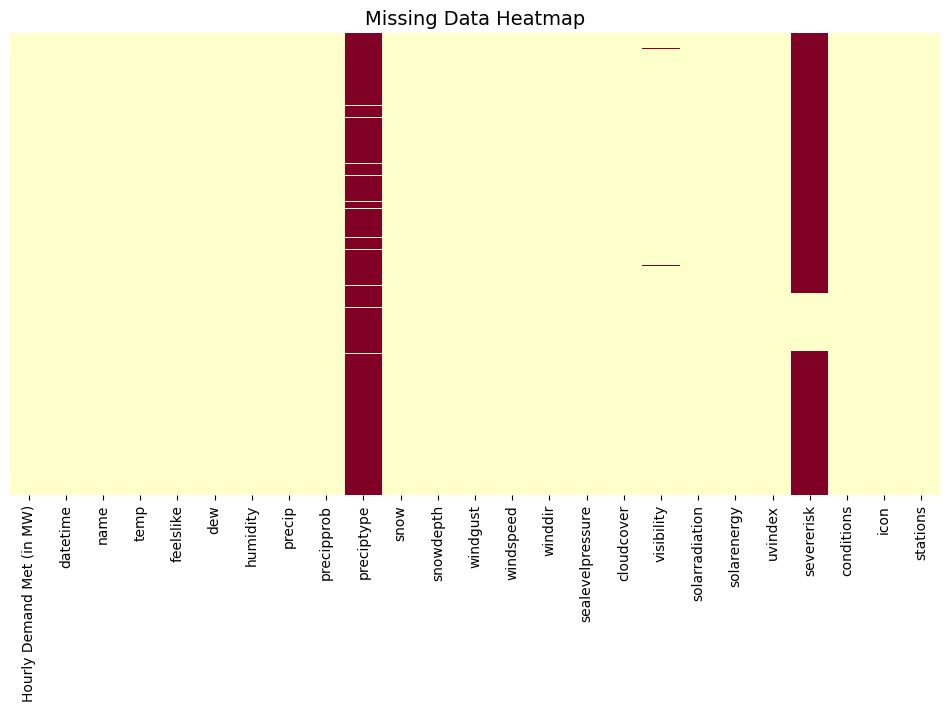

In [4]:
# Total missing values per column
missing_values = dataset.isnull().sum()

# Percentage of missing values
missing_percent = (missing_values / len(dataset)) * 100

# Combine into one DataFrame
missing_summary = pd.DataFrame({
    'Missing Values': missing_values,
    'Missing %': missing_percent.round(2)
}).sort_values(by='Missing %', ascending=False)

display(missing_summary)

# Missing values heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(dataset.isnull(), cbar=False, cmap='YlOrRd', yticklabels=False)
plt.title("Missing Data Heatmap", fontsize=14)
plt.show()

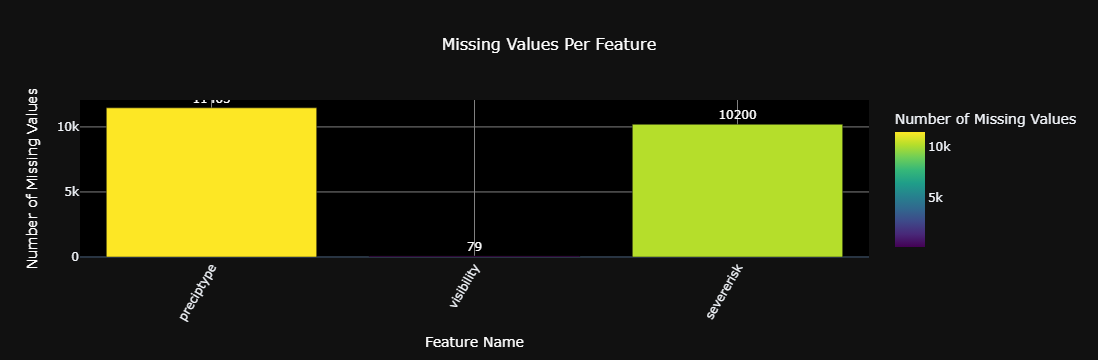

In [5]:

missing_df = dataset.isnull().sum().reset_index()
missing_df.columns = ['Feature', 'Missing']

# Create a bar plot
fig = px.bar(missing_df[missing_df['Missing'] > 0], 
             x='Feature', 
             y='Missing',
             title='Missing Values Per Feature', 
             text='Missing', 
             color='Missing',
             color_continuous_scale='Viridis',                                           # Custom color scale
             labels={'Feature': 'Feature Name', 'Missing': 'Number of Missing Values'},  # Axis labels
             template='plotly_dark') 

# Update text on bars
fig.update_traces(texttemplate='%{text}', textposition='outside', textfont=dict(size=12, color='white'))

# Improve axis appearance
fig.update_layout(
    xaxis_tickangle=-60, # Rotate x-axis labels more
    xaxis_title_font=dict(size=14, color='white'),
    yaxis_title_font=dict(size=14, color='white'),
    xaxis=dict(showgrid=True, gridcolor='gray'),
    yaxis=dict(showgrid=True, gridcolor='gray'),
    plot_bgcolor='black',  
    title_font=dict(size=16, color='white'),
    title_x=0.5 # Center the title
)

# Show the plot
fig.show()


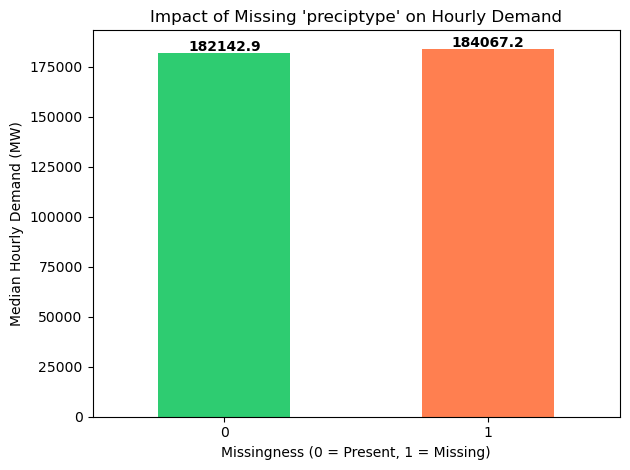

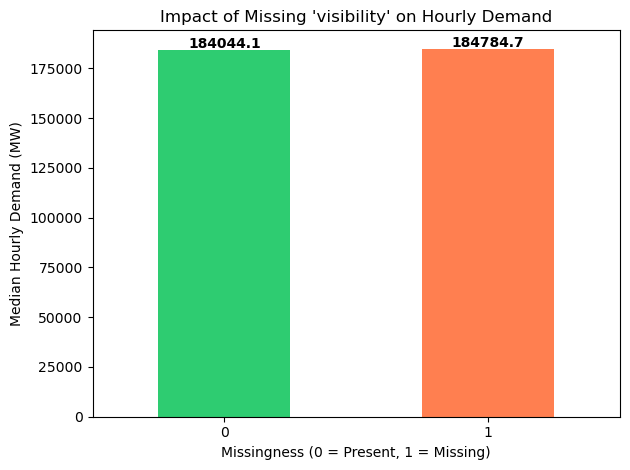

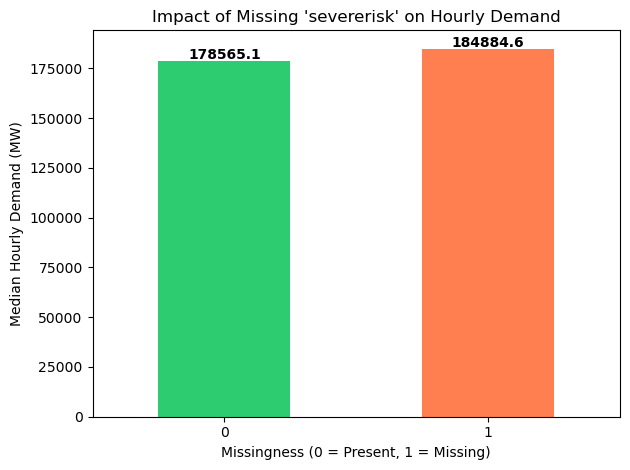

In [6]:
# Let's find the relationship between the feature(s) containing the missing values and the dependent variable (Hourly Demand Met)
features_with_nan = [features for features in dataset.columns if dataset[features].isnull().sum() > 1]

# Define custom colors (valid names or hex)
bar_colors = {0: '#2ecc71', 1: 'coral'}  # Eco green → hex, Coral → recognized name

for feature in features_with_nan:
    data = dataset.copy()

    # Mark missingness
    data[feature] = np.where(data[feature].isnull(), 1, 0)

    # Calculate median values grouped by missing flag
    median_values = data.groupby(feature)['Hourly Demand Met (in MW)'].median()

    # Set bar colors
    colors = [bar_colors[i] for i in median_values.index]

    # Plot
    ax = median_values.plot(kind='bar', color=colors)
    plt.title(f"Impact of Missing '{feature}' on Hourly Demand", fontsize=12)
    plt.ylabel("Median Hourly Demand (MW)")
    plt.xlabel("Missingness (0 = Present, 1 = Missing)")

    # Add values on bars
    for i, v in enumerate(median_values):
        ax.text(i, v + 1000, f"{v:.1f}", ha='center', fontweight='bold', fontsize=10)

    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()


#### Interpreting Missingness-Target Relationship

In this step, we analyzed whether the absence of data in selected features (`preciptype`, `visibility`, and `severerisk`) has any influence on the target variable — <code>Hourly Demand Met (in MW)</code>.

**Rule:**  
If the median value of the target differs significantly between missing and non-missing observations in a feature, the missingness is likely *not random* and may contain useful predictive information.

---

#### 📊 Observations from the Plots:

- **`preciptype`**: Median demand is higher when the feature is missing (~+1,900 MW).
- **`visibility`**: Slight increase in demand when missing (~+740 MW).
- **`severerisk`**: Substantial increase when missing (~+6,300 MW) — indicates strong signal.

So, we observe that the absence of values in features like `preciptype`, `visibility`, and `severerisk` is associated with notable shifts in energy demand. This indicates that the missingness is not random and may carry predictive value.

As a result, our preprocessing strategy includes:

- **Retaining** these features for modeling.
- **Adding binary indicators** for each feature to flag missing values (1 = missing, 0 = present).
- **Imputing** the missing values using suitable methods (e.g., mean, median, or mode), ensuring data completeness while preserving the significance of missingness.

This approach allows the model to leverage not just the observed data, but also the patterns hidden in the missing entries — supporting more accurate and context-aware forecasting. 

# <span style="background-color:#32CD32;color:white;padding:5px;">Numeric Feature Analysis</span>

Numeric features are essential for understanding the quantitative relationships within the data. By performing an analysis on these features, we can:
- **Examine distributions** to identify patterns, outliers, and skewness.
- **Visualize relationships** between different numeric features and the target variable.
- **Detect correlations** to understand how different numeric features interact with one another.
- **Identify anomalies or outliers** that may distort modeling results.

In this section, we will perform various visualizations such as distribution plots, boxplots, and correlation heatmaps to explore the numerical features in the dataset.

#### 1. Distribution Plots of Numerical Features

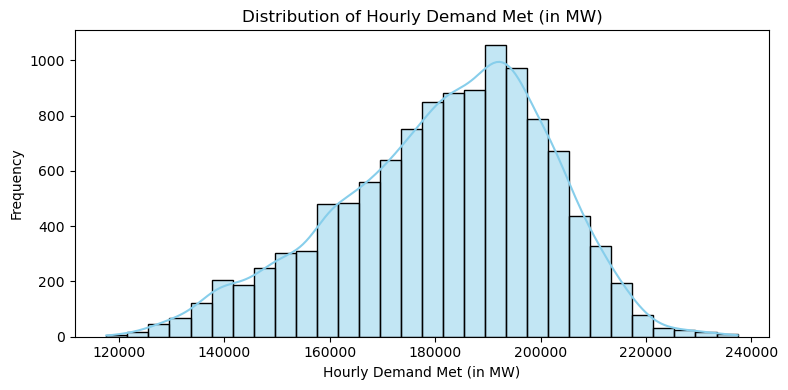

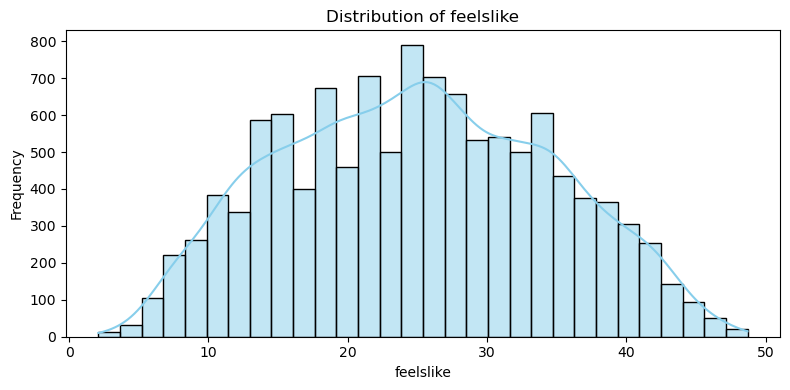

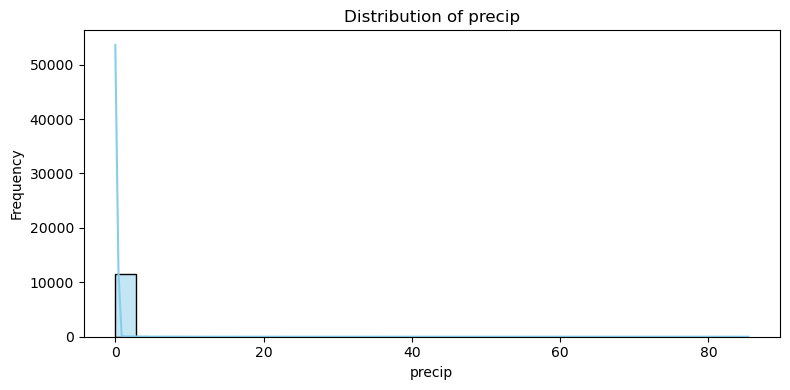

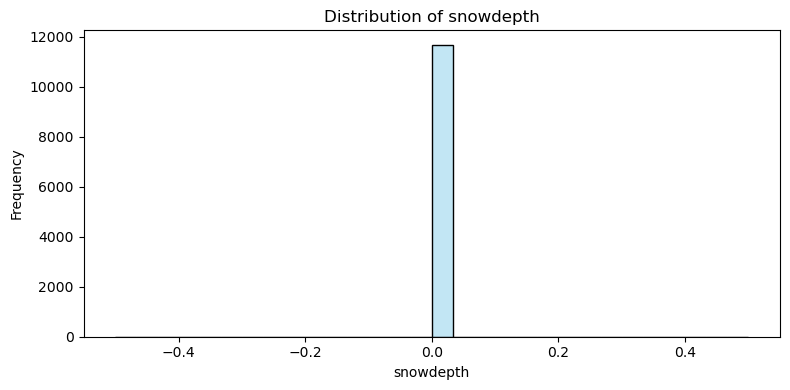

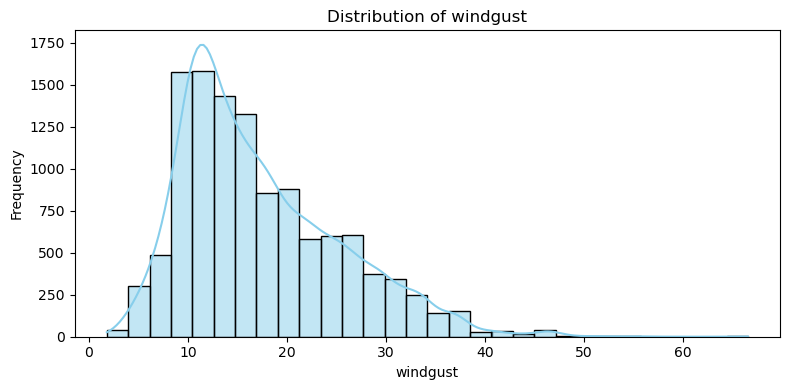

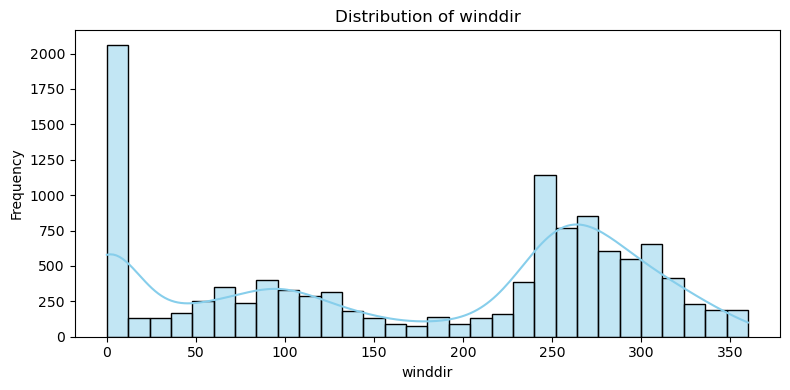

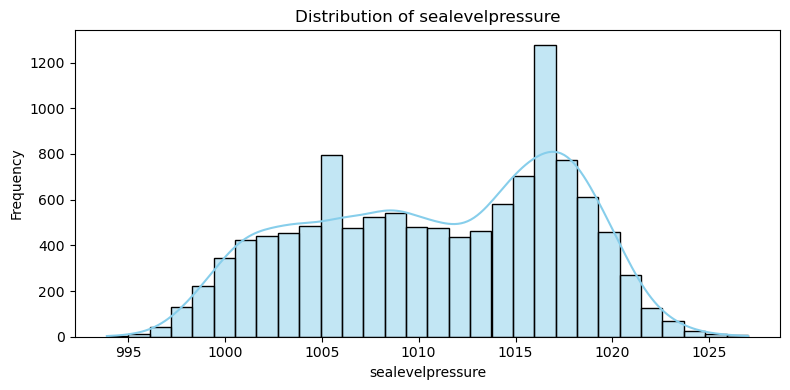

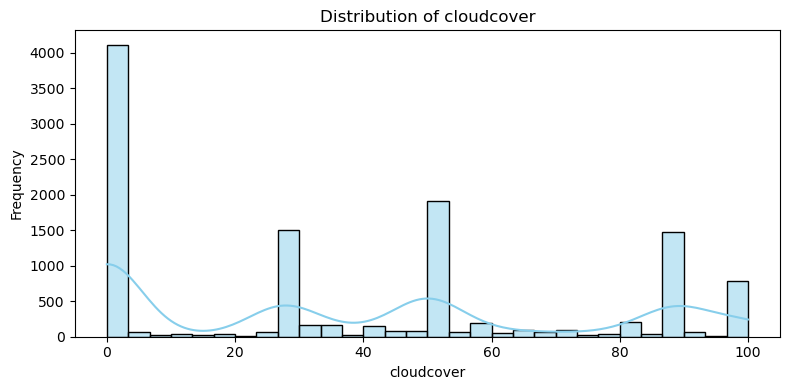

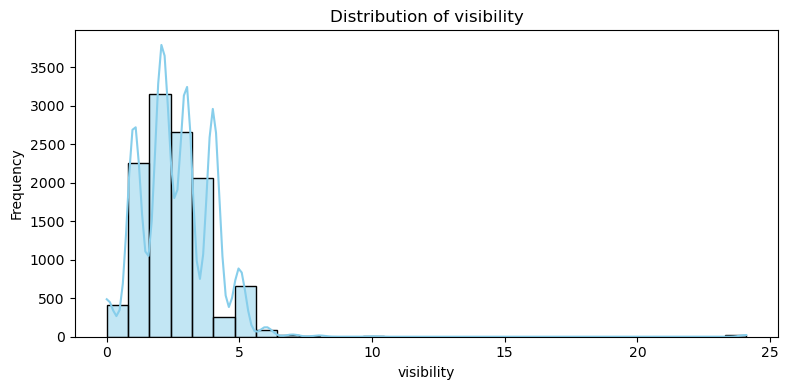

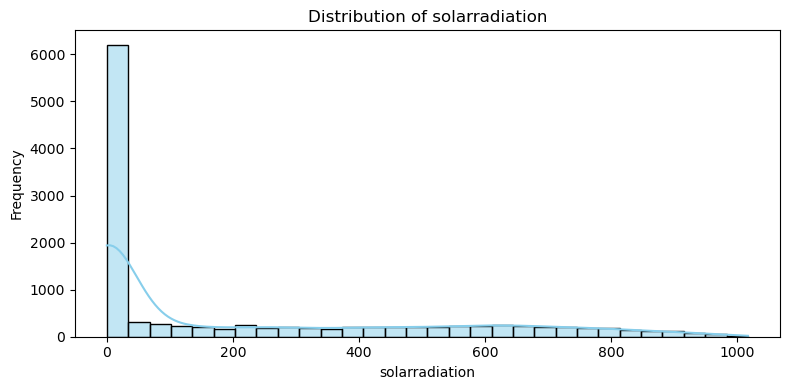

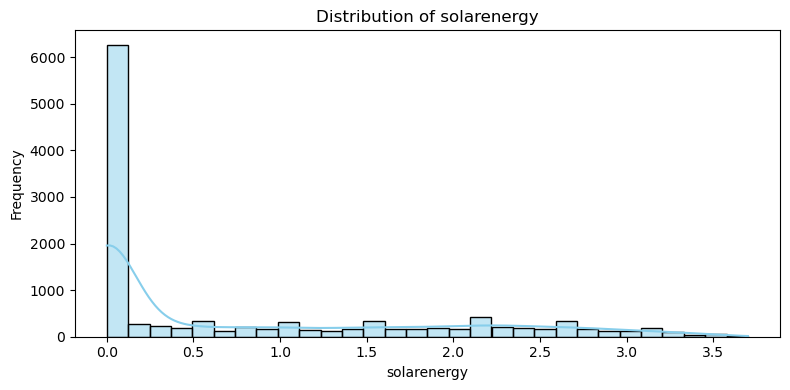

In [7]:
# Histogram with KDE for each numerical feature
num_cols = dataset.select_dtypes(include=['float64', 'int64']).columns

for col in num_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(dataset[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

#### 2. Computing Skewness & Kurtosis: Understanding Distribution Shapes

To evaluate how our features are distributed, we analyze two key statistical measures:

#### 🔁 Skewness – *Asymmetry of the Distribution*

- **Definition**: Skewness measures how symmetric a distribution is.
- **Ideal Value**: `0` (perfectly symmetric)
  
| Skewness Value | Interpretation |
|----------------|----------------|
| > 0          | Right-skewed (long tail on the right) |
| < 0          | Left-skewed (long tail on the left) |
| ≈ 0          | Symmetrical (normal-like distribution) |

> Features with high skewness may benefit from transformations (e.g., log, square root) to stabilize variance and improve model performance.

#### 🎯 Kurtosis – *Tailedness or Peakedness of the Distribution*

- **Definition**: Kurtosis indicates how heavy the tails are and how sharp the peak is.
- **Reference Value**: `3` (normal distribution)

| Kurtosis Value | Interpretation |
|----------------|----------------|
| > 3          | **Leptokurtic** – heavy tails, sharp peak |
| < 3          | **Platykurtic** – light tails, flat peak |
| ≈ 3          | **Mesokurtic** – normal peak and tails |

> High kurtosis indicates more outliers, while low kurtosis implies fewer extreme values.

In [8]:
from scipy.stats import skew, kurtosis
import pandas as pd

# Get numerical columns
num_cols = dataset.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Collect stats in a list
stats = []

for col in num_cols:
    s = skew(dataset[col].dropna())
    k = kurtosis(dataset[col].dropna())
    stats.append({"Feature": col, "Skewness": round(s, 2), "Kurtosis": round(k, 2)})

# Convert to DataFrame
skew_kurt_df = pd.DataFrame(stats)

# Sort by absolute skewness for inspection
skew_kurt_df = skew_kurt_df.sort_values(by="Skewness", key=lambda x: abs(x), ascending=False)

# Display
display(skew_kurt_df)


Feature  Skewness  Kurtosis
5                      precip     37.67   1744.41
6                  precipprob      7.66     56.73
18                 severerisk      4.56     83.92
14                 visibility      4.00     52.55
17                    uvindex      1.04     -0.37
16                solarenergy      1.03     -0.38
15             solarradiation      1.03     -0.38
9                    windgust      0.96      0.80
10                  windspeed      0.73      2.60
0   Hourly Demand Met (in MW)     -0.44     -0.21
13                 cloudcover      0.39     -1.22
11                    winddir     -0.32     -1.43
1                        temp     -0.28     -0.83
4                    humidity     -0.28     -1.04
3                         dew      0.25     -0.73
12           sealevelpressure     -0.21     -1.06
2                   feelslike      0.07     -0.79
7                        snow       NaN       NaN
8                   snowdepth       NaN       NaN

#### 3. Boxplots with IQR and Outlier Count

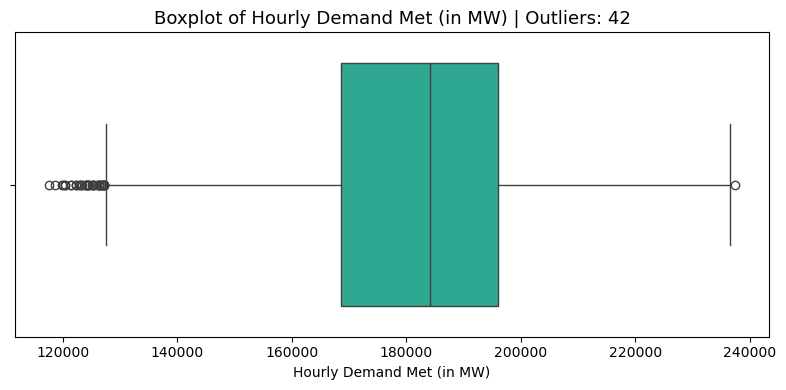

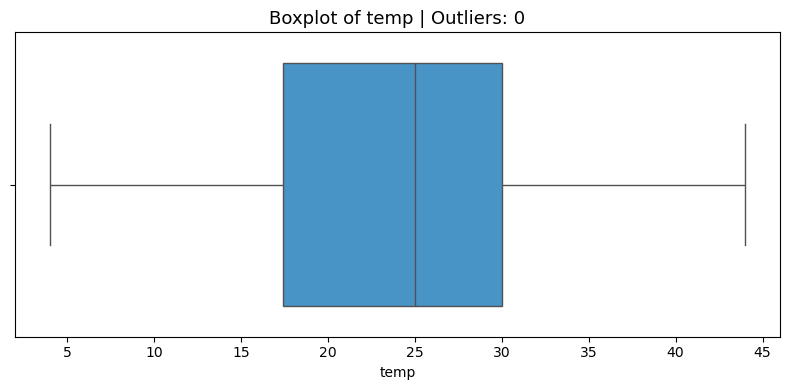

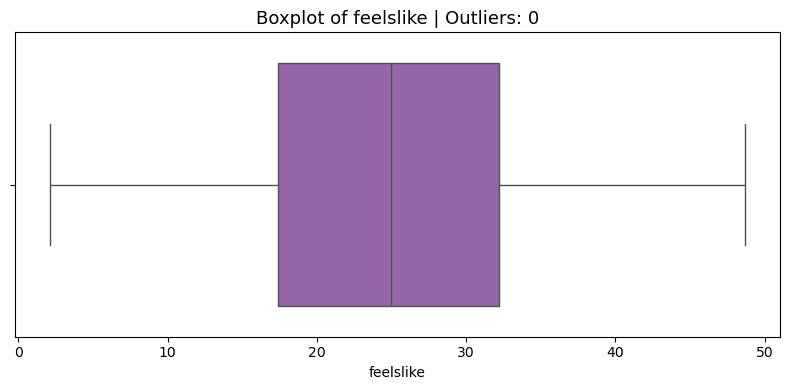

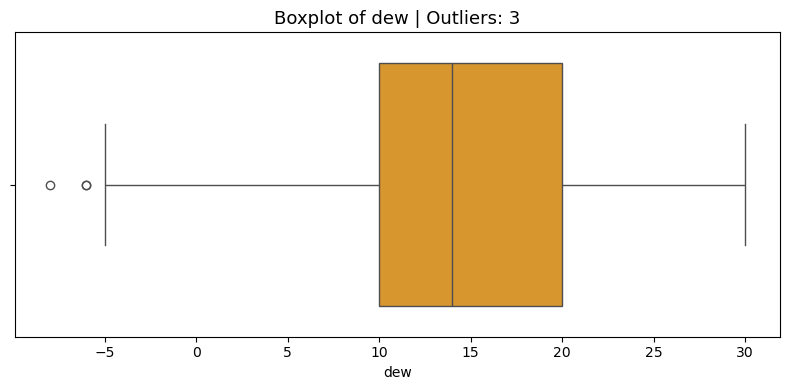

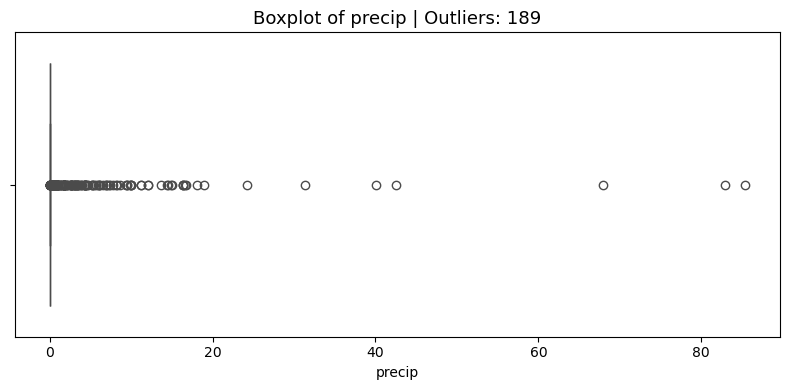

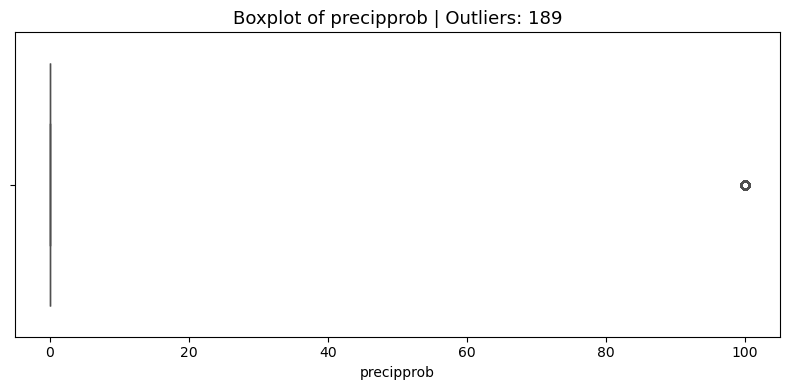

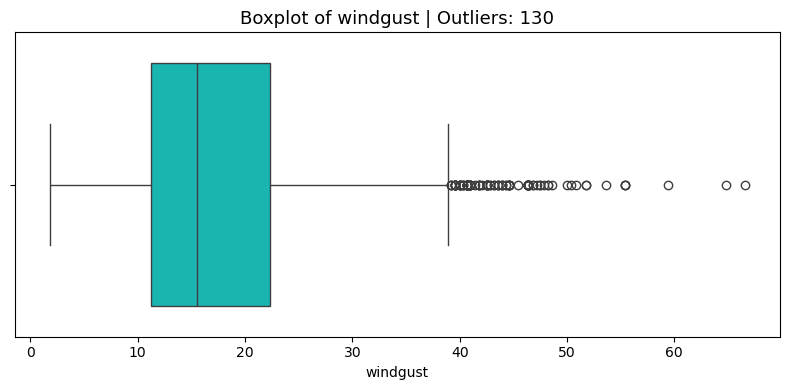

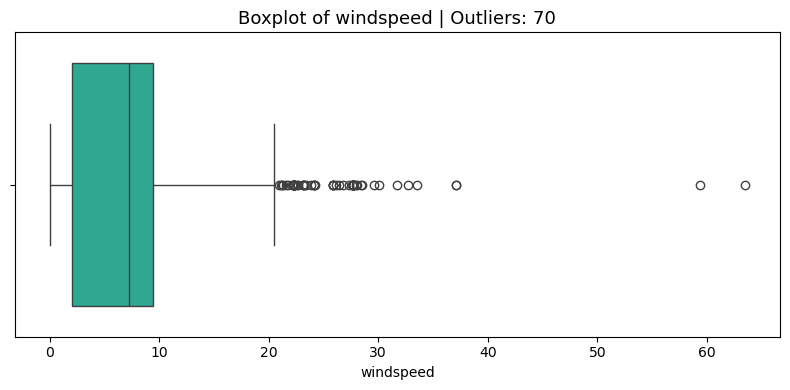

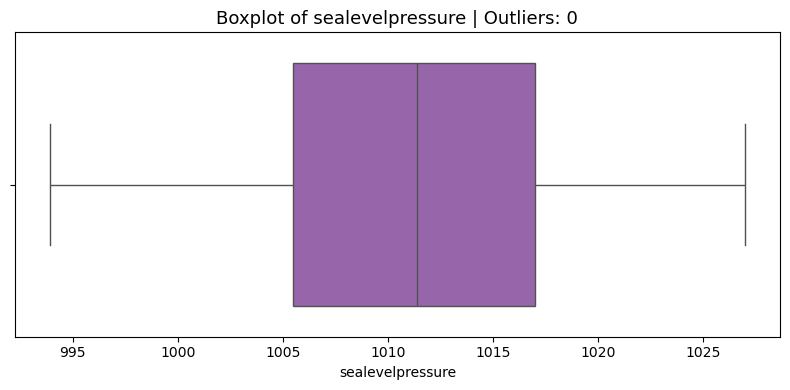

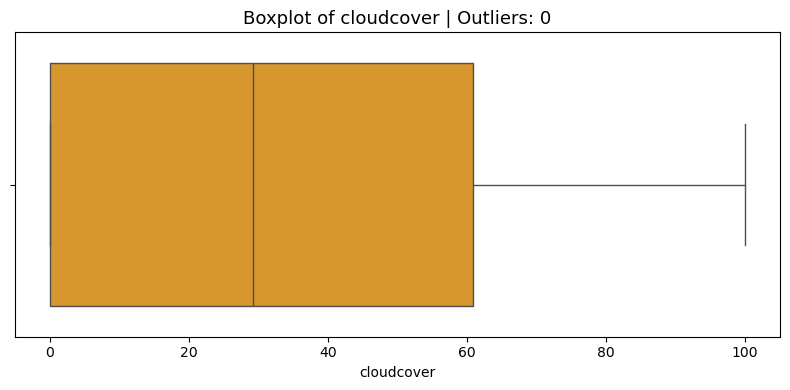

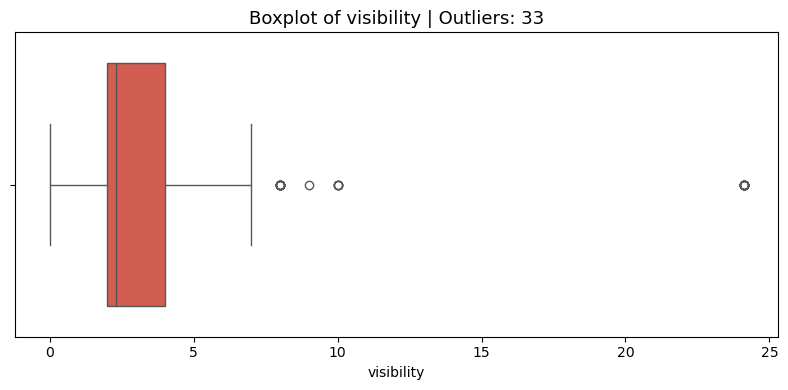

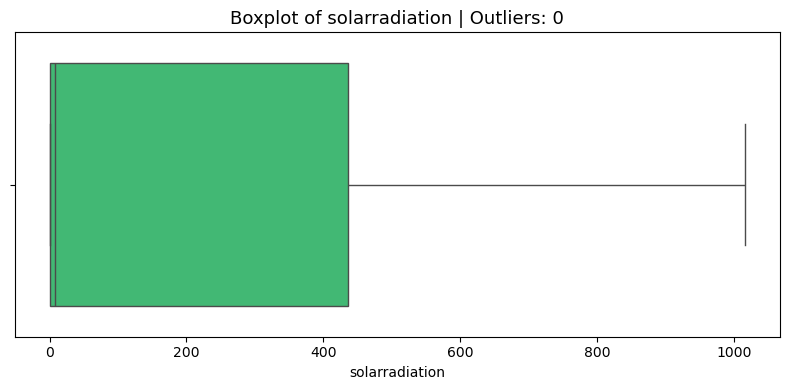

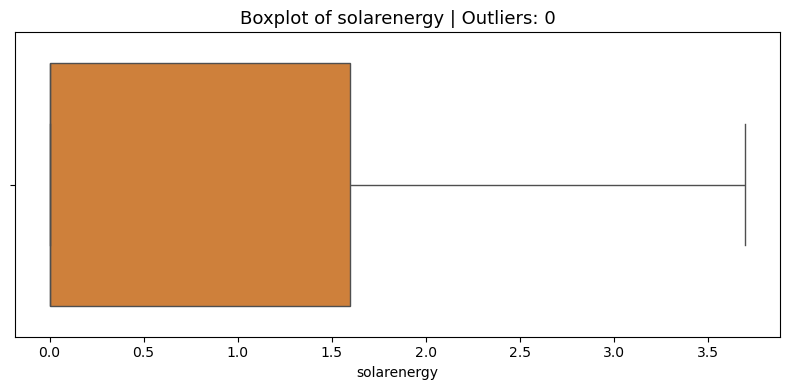

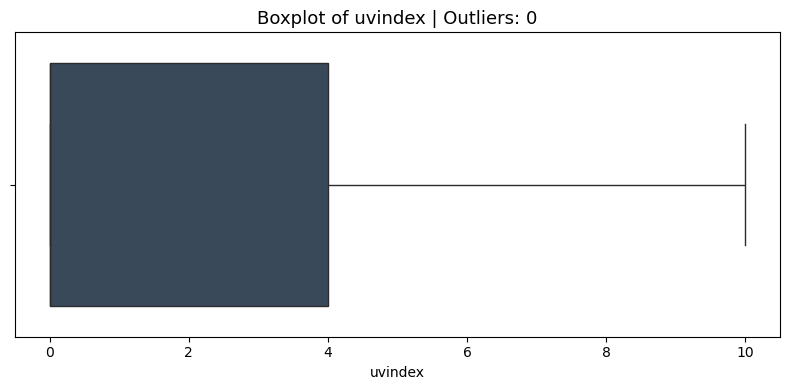

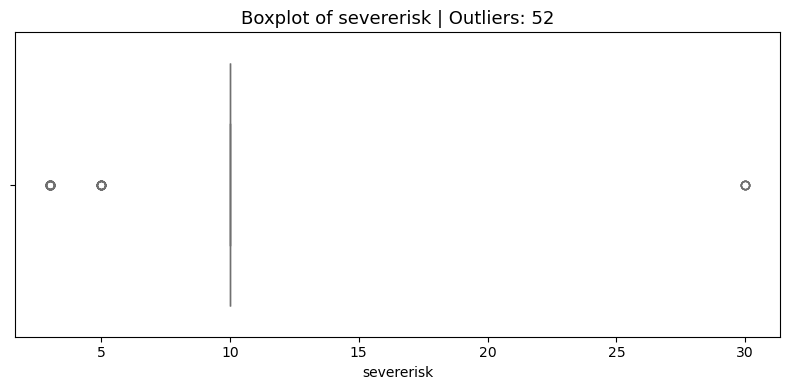

In [10]:
boxplot_colors = [
    '#1abc9c',  # Turquoise
    '#3498db',  # Soft Blue
    '#9b59b6',  # Amethyst
    '#f39c12',  # Orange Yellow
    '#e74c3c',  # Soft Red
    '#2ecc71',  # Emerald
    '#e67e22',  # Carrot
    '#34495e',  # Wet Asphalt
    '#fd79a8',  # Watermelon Pink
    '#00cec9'   # Aqua Blue
]

for i, col in enumerate(num_cols):
    Q1 = dataset[col].quantile(0.25)
    Q3 = dataset[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = dataset[(dataset[col] < lower_bound) | (dataset[col] > upper_bound)]
    outlier_count = outliers.shape[0]

    plt.figure(figsize=(8, 4))
    sns.boxplot(x=dataset[col], color=boxplot_colors[i % len(boxplot_colors)])
    plt.title(f"Boxplot of {col} | Outliers: {outlier_count}", fontsize=13)
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()

#### 4. Correlation Heatmap

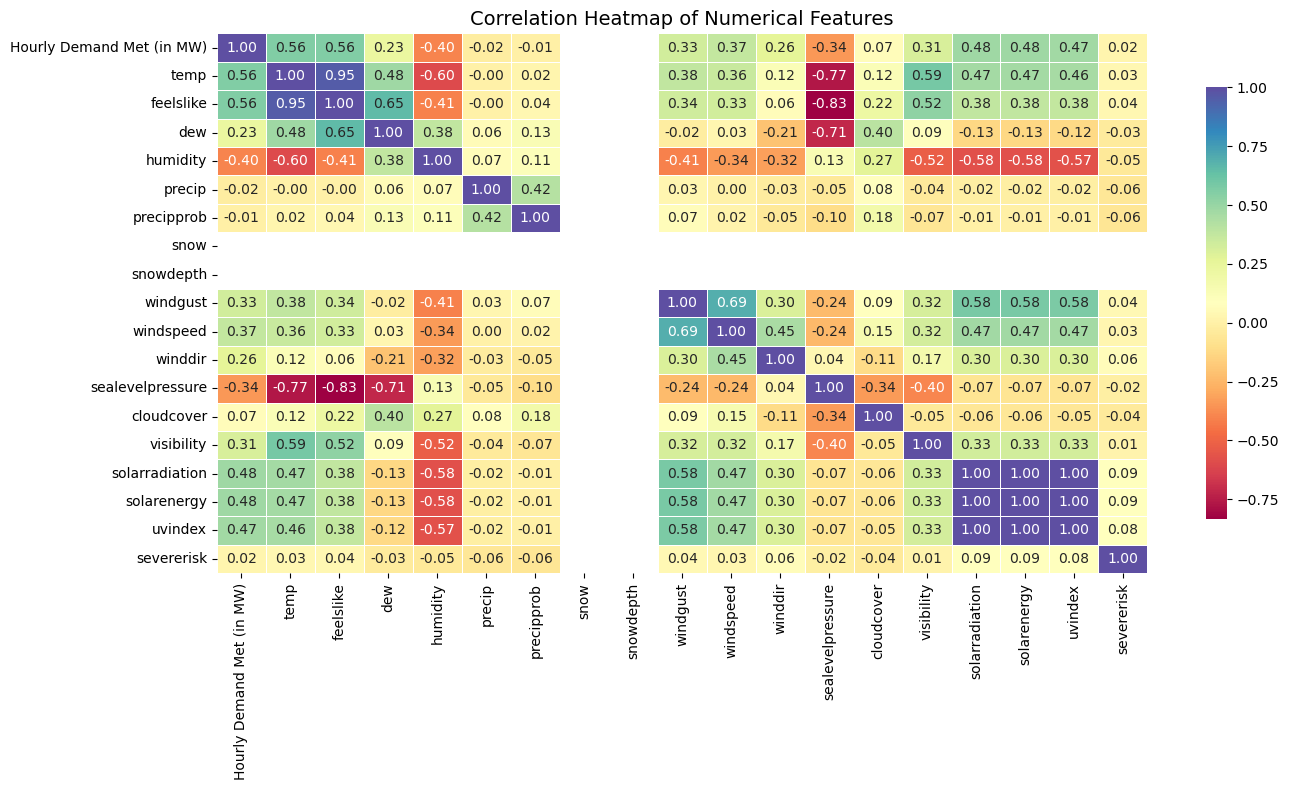

In [11]:
# Select only numeric columns for correlation matrix
numeric_df = dataset.select_dtypes(include=['int64', 'float64'])

# Compute correlation
correlation_matrix = numeric_df.corr()

plt.figure(figsize=(14, 8))
sns.heatmap(correlation_matrix, cmap='Spectral', annot=True, fmt=".2f", linewidths=0.4, cbar_kws={"shrink": 0.8})
plt.title("Correlation Heatmap of Numerical Features", fontsize=14)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

<div style="font-weight: 400;background-color: #d3f9d8; padding: 10px; border-radius: 5px;">

#### <span style="font-weight: 600;">Correlation Heatmap Analysis & Insights</span>

The correlation heatmap helps us understand how strongly numerical features are related to one another and to the target variable, **Hourly Demand Met (in MW)**.

##### ✅ <span style="font-weight: 600;">Target Variable Correlations:</span>
- **Positively correlated features:**
  - temp (0.56), feelslike (0.56)
  - solarradiation, solarenergy, uvindex (~0.48)
  - dew, windspeed, windgust, visibility (0.23 to 0.37)
- **Negatively correlated features:**
  - humidity (-0.40)
  - sealevelpressure (-0.34)

 **Insight:** Energy demand tends to increase with higher temperatures, solar exposure, and wind activity, while high humidity and sea-level pressure reduce demand — aligning well with seasonal and climatic energy usage behavior.

</div>

---

<div style="background-color: #d3f9d8; padding: 10px; border-radius: 5px;">

#### <span style="font-weight: 600;">General Insights:</span>
- High correlation between some weather features (e.g., temp, feelslike, dew) suggests potential multicollinearity, which may affect the performance and interpretability of linear models.
- To enhance model robustness, it is often beneficial to <span style="font-weight:600;">remove or consolidate highly correlated features</span> during feature selection.
- Non-linear models (such as decision trees or ensemble methods) tend to handle multicollinearity better, so even moderately correlated variables may still offer predictive value.
- The correlation matrix serves as a valuable reference for:
  - Feature selection or elimination,
  - Creating meaningful interactions between variables,
  - Reducing dimensionality where applicable.
- These insights lay the groundwork for informed feature engineering and efficient model tuning in subsequent steps.

</div>

---

<div style="font-weight: 500; background-color: #e6e6fa; padding: 10px; border-radius: 5px;">

#### Preprocessing Decisions from Correlation Heatmap:

<table style="background-color: #e6e6fa; border-radius: 5px; width: 100%; border-collapse: collapse; padding: 5px;">
  <tr>
    <th style="font-weight: 700; padding: 10px; text-align: left; width: 20%;">Feature</th>
    <th style="font-weight: 700; padding: 10px; text-align: left; width: 15%;">Action</th>
    <th style="font-weight: 700; padding: 10px; text-align: left; width: 65%;">Reason</th>
  </tr>
  <tr>
    <td style="padding: 10px;">feelslike</td>
    <td style="padding: 10px;">❌ Drop</td>
    <td style="padding: 10px;">Highly correlated with <code>temp</code> (0.95) → potential multicollinearity</td>
  </tr>
  <tr>
    <td style="padding: 10px;">solarenergy</td>
    <td style="padding: 10px;">❌ Drop</td>
    <td style="padding: 10px;">Almost perfectly correlated with <code>solarradiation</code> (1.00) → redundant</td>
  </tr>
  <tr>
    <td style="padding: 10px;">uvindex</td>
    <td style="padding: 10px;">✅ Keep</td>
    <td style="padding: 10px;">Adds interpretability; not fully redundant</td>
  </tr>
  <tr>
    <td style="padding: 10px;">dew</td>
    <td style="padding: 10px;">✅ Keep</td>
    <td style="padding: 10px;">Moderate correlation; adds valuable variation</td>
  </tr>
  <tr>
    <td style="padding: 10px;">snow, snowdepth</td>
    <td style="padding: 10px;">❌ Drop</td>
    <td style="padding: 10px;">Completely missing values; not usable without external seasonal data</td>
  </tr>
  <tr>
    <td style="padding: 10px;">precip, precipprob</td>
    <td style="padding: 10px;">🤔 Inspect</td>
    <td style="padding: 10px;">Weakly correlated — test performance impact of keeping either</td>
  </tr>
  <tr>
    <td style="padding: 10px;">sealevelpressure</td>
    <td style="padding: 10px;">✅ Keep</td>
    <td style="padding: 10px;">Moderate negative correlation; meteorologically relevant</td>
  </tr>
  <tr>
    <td style="padding: 10px;">windgust, windspeed</td>
    <td style="padding: 10px;">❌ Maybe Drop One</td>
    <td style="padding: 10px;">Correlated (0.69) → check with VIF or test empirically</td>
  </tr>
</table>

</div>

#### Note: Since we’re using non-linear models, trendline plots are optional — these models can capture complex feature-target relationships without relying on linear trends.

# <span style="background-color:#FF1493;color:white;padding:5px;">Categorical Feature Analysis</span>

Categorical features provide critical insights into the categorical characteristics of the data. Analyzing these features helps to:
- **Visualize distributions** of categories and their frequencies.
- **Assess the impact** of categorical features on the target variable.
- **Understand relationships** between categorical features and other features using bar plots, count plots, or stacked bar charts.
- **Identify potential imbalances** or missing categories that might need attention in further analysis.

In this section, we will explore various plots such as bar plots, count plots, and cross-tabulations to better understand the categorical features in the dataset.


In [1]:
# Importing the libraries again
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading the dataset
dataset = pd.read_csv('merged_data.csv')

#### 🏷️ 1. Categorical Feature Identification & Cardinality

We identify all categorical (object-type) features in the dataset and calculate their cardinality, i.e., the number of unique values in each. Features with very high cardinality may need encoding strategies (e.g., frequency encoding), while low-cardinality features may be directly one-hot encoded or label encoded.

This step helps inform our feature engineering and encoding decisions in later stages.


In [3]:
categorical_features = [feature for feature in dataset.columns if dataset[feature].dtypes == 'O']
print("Count of Categorical features: {}".format(len(categorical_features)))
print("These are: \n")
categorical_features

Count of Categorical features: 6
These are: 



['datetime', 'name', 'preciptype', 'conditions', 'icon', 'stations']

In [4]:
dataset[categorical_features].head()

datetime   name preciptype conditions         icon  \
0  2023-01-01 00:00:00  india        NaN      Clear  clear-night   
1  2023-01-01 01:00:00  india        NaN      Clear  clear-night   
2  2023-01-01 02:00:00  india        NaN      Clear  clear-night   
3  2023-01-01 03:00:00  india        NaN      Clear  clear-night   
4  2023-01-01 04:00:00  india        NaN      Clear  clear-night   

                       stations  
0              VIDP,42181099999  
1              VIDP,42181099999  
2  42182099999,VIDP,42181099999  
3              VIDP,42181099999  
4              VIDP,42181099999

In [5]:
for feature in categorical_features:
    print("The feature is {} and no. of categories is {}".format(feature, len(dataset[feature].unique())))

The feature is datetime and no. of categories is 11664
The feature is name and no. of categories is 2
The feature is preciptype and no. of categories is 2
The feature is conditions and no. of categories is 5
The feature is icon and no. of categories is 8
The feature is stations and no. of categories is 22


In [7]:
# Summary DataFrame for cardinality
cat_cardinality = pd.DataFrame({
    'Feature': categorical_features,
    'Unique Values': [dataset[col].nunique() for col in categorical_features],
    'Missing Values': [dataset[col].isnull().sum() for col in categorical_features]
}).sort_values(by='Unique Values', ascending=False)

display(cat_cardinality)


Feature  Unique Values  Missing Values
0    datetime          11664               0
5    stations             22               0
4        icon              8               0
3  conditions              5               0
1        name              2               0
2  preciptype              1           11465

<div style="background-color:#fff5e6; padding:12px; border-radius:8px; font-size:14px; line-height:1.6;">
    
⚠️ <b>Note:</b>   

As the datetime feature will be addressed under ***Feature Engineering*** and is not part of the categorical feature analysis, we will ***exclude it*** from the current analysis. This step ensures that we focus on the other categorical features, which include: ***name, preciptype, conditions, icon & stations.***

</div>

#### 2. Distribution of Categorical Features

Visualizing the distribution of categorical variables helps to:
- Identify the frequency of each category.
- Detect class imbalances that might affect model performance.
- Provide a clear view of the data's composition for each categorical feature.

In this section, we will visualize the distribution of each categorical feature using **count plots** to understand the distribution and frequency of categories.


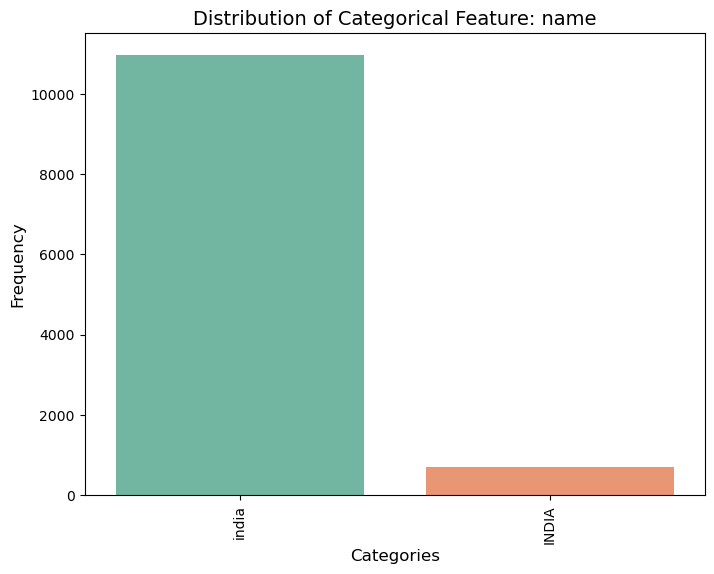

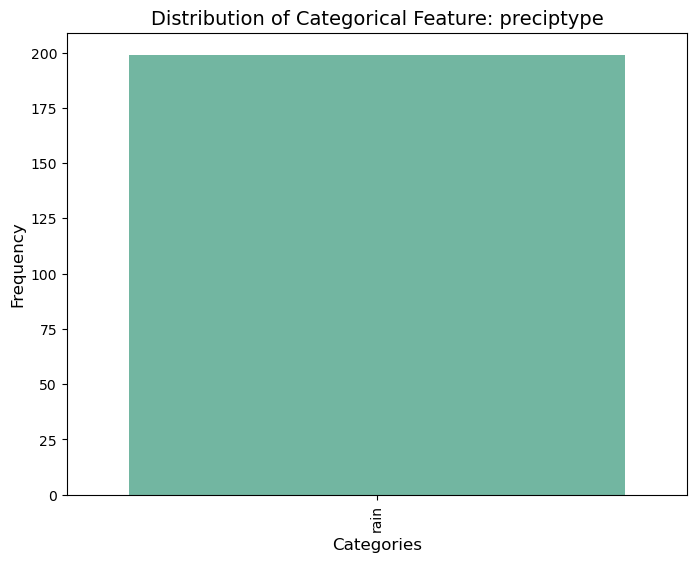

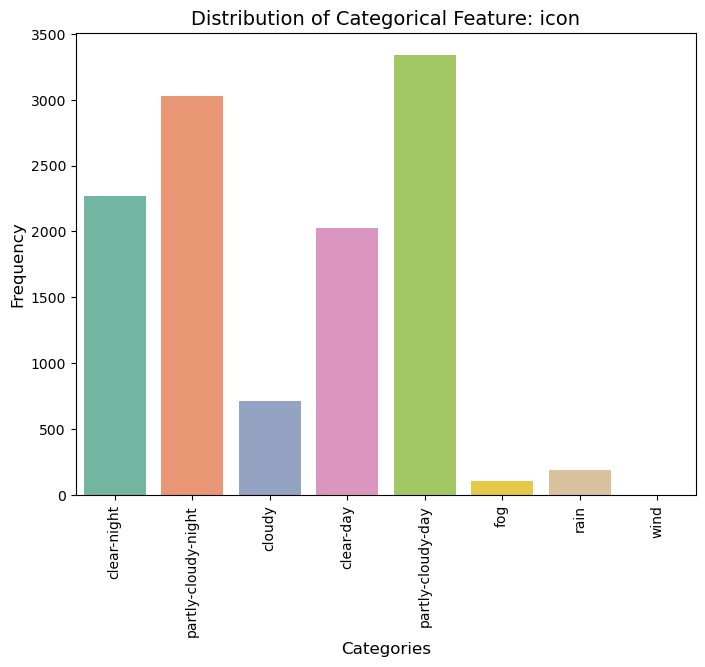

In [8]:
for feature in categorical_features:
    # Skip the 'datetime' feature from analysis
    if feature == 'datetime':
        continue
    
    # Create a count plot for the categorical feature
    plt.figure(figsize=(8, 6))
    sns.countplot(x=feature, data=dataset, palette='Set2')

    # Title and labels
    plt.title(f'Distribution of Categorical Feature: {feature}', fontsize=14)
    plt.xlabel('Categories', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

    # Show the plot
    plt.show()


#### 2. Relationship between Categorical Features and Target Variable

Analyzing the relationship between categorical features and the target variable helps to:
- Understand how categorical features impact the target variable.
- Identify if certain categories have a significant influence on the target.
- Guide feature selection and possible encoding techniques.

We will visualize this relationship using **boxplots**, **violin plots**, or **bar plots**, depending on the type of target variable.


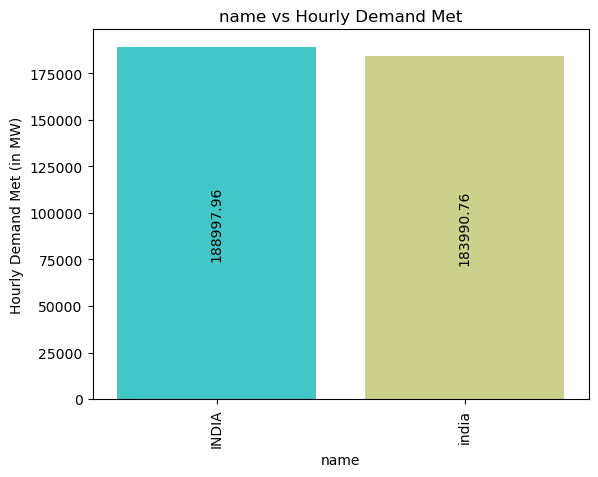

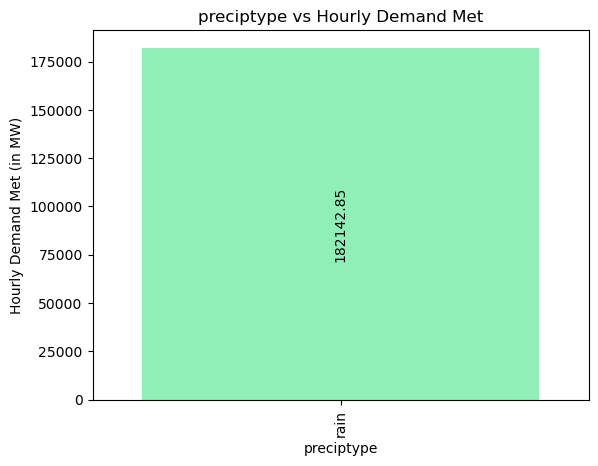

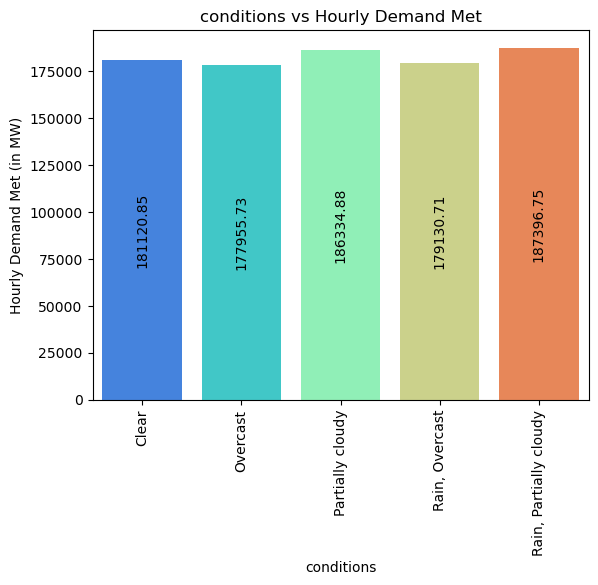

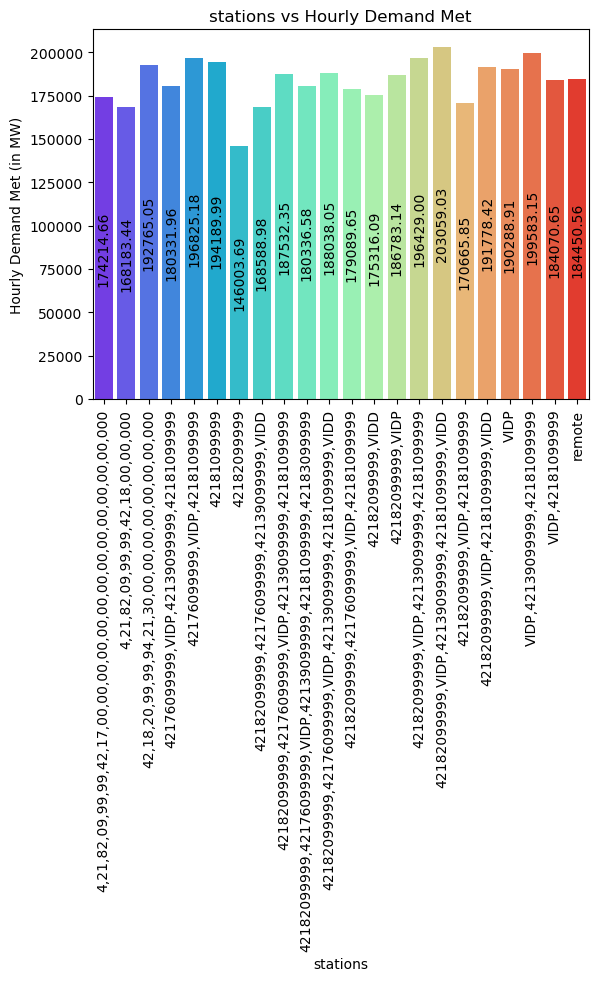

In [9]:
# Now we find out the relationship between categorical variables and dependent feature 'Hourly Demand Met (in MW)'
for feature in categorical_features:
    # Skip 'datetime' feature
    if feature == 'datetime':
        continue
    
    # Copy dataset to avoid modifying the original
    data = dataset.copy()

    # Group by categorical feature and calculate the median of 'Hourly Demand Met (in MW)'
    median_demand = data.groupby(feature)['Hourly Demand Met (in MW)'].median().reset_index()

    # Plot the relationship between categorical feature and hourly demand
    ax = sns.barplot(data=median_demand, x=feature, y='Hourly Demand Met (in MW)', palette='rainbow')

    # Adding values inside the bars
    # Adding values inside the bars, vertically rotated and black color
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height:.2f}',                               # Value to display
                    (p.get_x() + p.get_width() / 2., height / 2),  # Position of the annotation (centered inside the bar)
                    ha='center', va='center',                      # Horizontal and vertical alignment
                    fontsize=10, color='black',                    # Font size and color (black for better visibility)
                    rotation=90,                                   # Rotate the text by 90 degrees
                    xytext=(0, 0),                                 # No offset
                    textcoords='offset points')
    plt.xlabel(feature)
    plt.ylabel('Hourly Demand Met (in MW)')
    plt.title(f'{feature} vs Hourly Demand Met')
    plt.xticks(rotation=90)
    plt.show()


<div style="background-color:#fff5e6; padding:12px; border-radius:8px; font-size:14px; line-height:1.6;">
    
#### Our Analysis:
#### 1. Name:
After cleaning the "name" feature by standardizing the case (converting all values to lowercase), it was found that the feature only contains a single category: **"india"**. Since there is no variation in this feature, it will be **removed during the data preprocessing** step. As a result, the relationship between name and the target variable, **'Hourly Demand Met (in MW)'**, will not be analyzed further.

#### 2. Preciptype:
The "preciptype" feature also contains a single category, **"rain"**, making it a constant feature. As there is no variability in this feature, it will be **removed during the data preprocessing** step. Therefore, it will not contribute to the model or analysis.

#### 3. Conditions:
The "conditions" feature represents the weather conditions such as **clear**, **cloudy**, **rain**, **overcast**, and others. The analysis suggests that **clear** days generally correlate with lower energy demand, while **cloudy**, **overcast**, or **rainy** conditions tend to result in higher energy consumption due to the increased need for heating or lighting. Specifically, **overcast** days are also associated with a rise in energy demand, as they often signal cooler weather that requires additional heating.

#### 4. Icon:
The "icon" feature corresponds to weather icons that reflect the weather conditions. Similar to conditions, extreme weather icons (such as thunderstorms or snowy icons) tend to be associated with increased energy demand. This feature helps visualize the relationship between weather conditions and energy consumption.

#### 5. Stations:
The "stations" feature contains information about different recording stations. With **22 unique stations**, this feature highlights variations in energy demand across different locations. Some stations, possibly located in regions with higher industrial activity or specific weather conditions, consistently show higher energy consumption. This could help in identifying regions with peak energy demand and designing region-specific strategies.
</div>

#### Combined Violin & Boxplot — Target vs Categorical Feature

This visualization combines the statistical clarity of a boxplot with the distributional insight of a violin plot. It helps us understand both the **central tendency** and the **spread/density** of energy demand across different weather conditions.

- The **white dot** represents the median.
- The **thick bar** shows the interquartile range (IQR).
- The **violin shape** illustrates the distribution (wider areas = more data).

This type of plot is especially useful when distributions are skewed or multimodal.


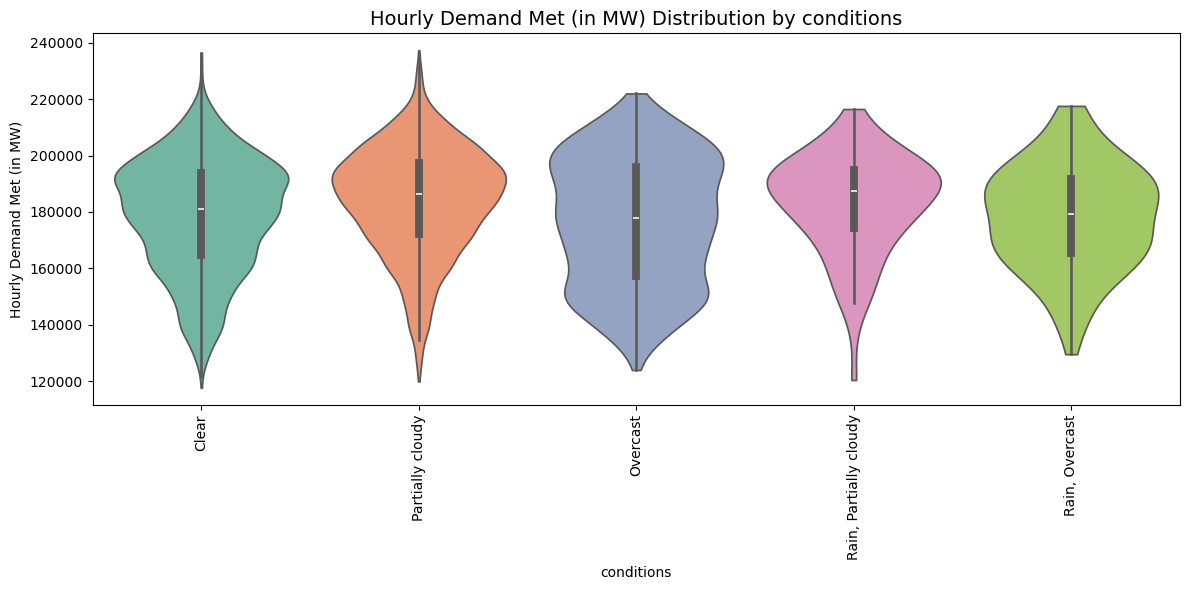

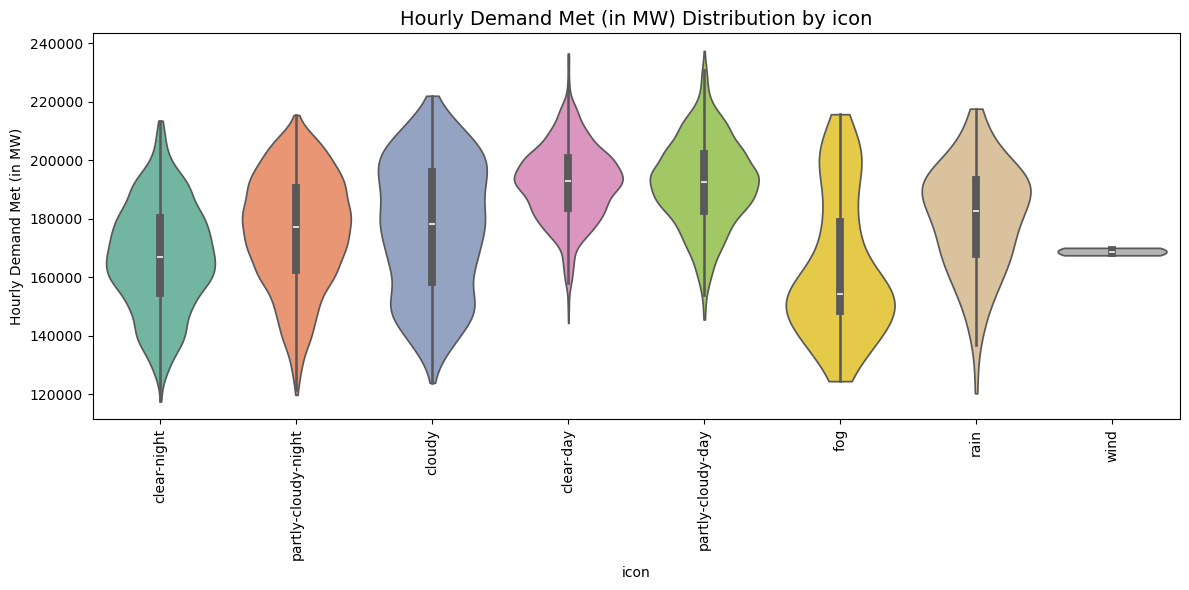

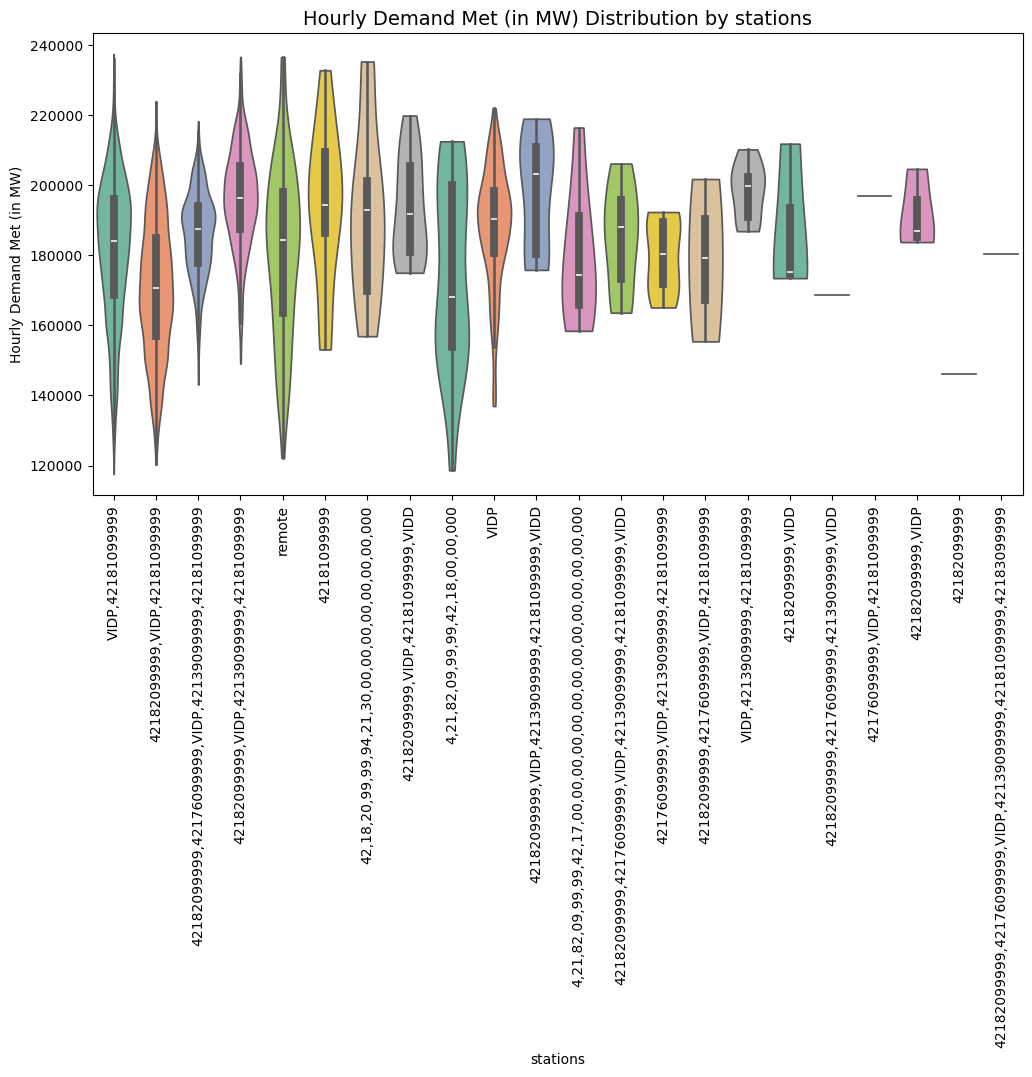

In [11]:
# Target variable
target = 'Hourly Demand Met (in MW)'

# Loop through each categorical feature
for col in categorical_features:
    if col == 'datetime':
        continue
        
    plt.figure(figsize=(12, 6))
    
    # Creating a violin plot for the distribution of target variable by categorical feature
    sns.violinplot(data=dataset, 
                   x=col, 
                   y=target, 
                   inner='box', 
                   palette='Set2', 
                   cut=0, 
                   scale='width')
    
    # Adding title, x-axis labels, and adjusting layout
    plt.title(f"{target} Distribution by {col}", fontsize=14)
    plt.xticks(rotation=90)
    plt.tight_layout()
    
    # Display the plot
    plt.show()


#### Conclusion: Categorical Feature Analysis

In this section, we analyzed the relationship between various **categorical features** and the target variable, **`Hourly Demand Met (in MW)`**. Using **barplots**, **violin plots**, and **distribution counts**, we extracted meaningful patterns and insights from the following features:
- `name` (to be removed – low variance after standardization)
- `preciptype` (to be removed – only one category)
- `conditions`
- `icon`
- `stations`

We visualized the distribution of energy demand across each of these categorical features to understand how different weather patterns and reporting stations influence power usage.

---

<div style="background-color:#fff5e6; padding:12px; border-radius:8px; font-size:14px; line-height:1.6;">
    
#### 🕒 **Note on Temporal Feature (datetime):**

The feature "datetime" was excluded from this analysis intentionally. The "datetime" column has **not been treated as a categorical variable**, despite its datatype. It contains rich temporal patterns such as **hour of the day**, **day of the week**, **seasonal shifts**, and more. These patterns will be **strategically extracted and analyzed under the Feature Engineering section** to uncover:
- Daily and seasonal energy demand trends
- Peak hour detection
- Time-based lag/rolling features (if needed)

</div>


✅ With this, the categorical feature analysis is complete. Let's move forward to data preprocessing and feature engineering for even deeper insights!


<div style="background-color:#eafaf1; padding:14px; border-radius:8px;">
<h3 style="margin:0; color:#1e8449;">Step 5: Data Preprocessing & Cleaning</h3>
</div>

<div style="text-align: justify; font-size: 14px; line-height: 1.6;">
With the dataset now structurally inspected, we proceed to the cleaning phase to prepare it for analysis and modeling. This step focuses on resolving data inconsistencies, handling missing values, and removing unnecessary or redundant features.

Our goal is to ensure the dataset is well-organized, efficient, and free of noise — allowing the downstream machine learning pipeline to work with clean and meaningful inputs.
</div>
<div style="font-size: 14px; line-height: 1.6;">
<b>Subsections in this stage:</b><br>
5.1 Handling Missing Values<br>
5.2 Removing Irrelevant or Redundant Features<br>
5.3 Ensuring Consistency and Saving the Final Cleaned Dataset
</div>


In [12]:
# Data loading and reviewing
import pandas as pd

df = pd.read_csv('merged_data.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11664 entries, 0 to 11663
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Hourly Demand Met (in MW)  11664 non-null  float64
 1   datetime                   11664 non-null  object 
 2   name                       11664 non-null  object 
 3   temp                       11664 non-null  float64
 4   feelslike                  11664 non-null  float64
 5   dew                        11664 non-null  float64
 6   humidity                   11664 non-null  float64
 7   precip                     11664 non-null  float64
 8   precipprob                 11664 non-null  int64  
 9   preciptype                 199 non-null    object 
 10  snow                       11664 non-null  int64  
 11  snowdepth                  11664 non-null  int64  
 12  windgust                   11664 non-null  float64
 13  windspeed                  11664 non-null  flo

Hourly Demand Met (in MW)             datetime   name  temp  feelslike  \
0                  138212.80  2023-01-01 00:00:00  india  11.0       11.0   
1                  134620.74  2023-01-01 01:00:00  india  10.0        9.6   
2                  131384.79  2023-01-01 02:00:00  india   8.6        8.6   
3                  130602.47  2023-01-01 03:00:00  india  10.0       10.0   
4                  133288.97  2023-01-01 04:00:00  india   9.0        8.5   

    dew  humidity  precip  precipprob preciptype  ...  sealevelpressure  \
0  10.0     93.55     0.0           0        NaN  ...            1020.0   
1   9.0     93.50     0.0           0        NaN  ...            1020.0   
2   7.6     93.83     0.0           0        NaN  ...            1019.5   
3   9.0     93.50     0.0           0        NaN  ...            1019.0   
4   9.0    100.00     0.0           0        NaN  ...            1019.0   

   cloudcover  visibility  solarradiation  solarenergy  uvindex  severerisk  \
0         0.0         2.0             0.0          0.0        0         NaN   
1         0.0         2.0             0.0          0.0        0         NaN   
2         0.0         1.2             0.0          0.0        0         NaN   
3         0.0         2.0             0.0          0.0        0         NaN   
4         0.0         1.0             0.0          0.0        0         NaN   

   conditions         icon                      stations  
0       Clear  clear-night              VIDP,42181099999  
1       Clear  clear-night              VIDP,42181099999  
2       Clear  clear-night  42182099999,VIDP,42181099999  
3       Clear  clear-night              VIDP,42181099999  
4       Clear  clear-night              VIDP,42181099999  

[5 rows x 25 columns]

<div style="background-color:#eaf4ff; padding: 12px; border-radius: 8px; width: fit-content; display: inline-block;">

#### 5.1 Initial Feature Pruning

</div>

Prior to performing any data cleaning or modeling, it is crucial to perform **initial feature pruning**—the process of systematically eliminating features that offer little to no value in predicting the target variable. This step helps reduce dimensionality, minimizes noise, and optimizes both model performance and interpretability.

The following features were identified for removal based on our exploratory analysis:

- **Constant or zero-variance features**:  
  `snow` and `snowdepth` contain only a single repeated value (zero) across all records, offering no predictive signal.

- **Unique identifiers or non-informative columns**:  
  No features like `ID` or `timestamp` were found in this dataset, so no removal was necessary under this category.

- **Highly correlated features**:  
  To prevent multicollinearity and redundant learning, we removed `feelslike` and `solarenergy`, both of which showed high correlation with other numerical features during EDA.

- **Single-category categorical features**:  
  `name` and `preciptype` contain only one unique category throughout and therefore hold no discriminatory power.

- **Metadata or descriptive text fields**:  
  `stations`, `icon`, and `conditions` are qualitative descriptors or meta-fields not suitable for quantitative modeling and were excluded.

- **Sparse or heavily null features**:  
  `preciptype` and `severerisk` exhibit a large proportion of missing values, making them unreliable and prone to introducing noise. These were also removed.

> 🔬 <i>“Initial feature pruning is the art of decluttering your dataset—removing the irrelevant to reveal the informative.”</i>

By applying this pruning step early, we ensure that our dataset is lean, relevant, and primed for effective data preprocessing and feature engineering.


In [14]:
# Make a copy of the original dataset
df_pruned = df.copy()

# Drop constant / zero-variance features
constant_features = ['snow', 'snowdepth']
df_pruned.drop(columns = constant_features, inplace = True)

# Drop single-category features
single_category_features = ['name', 'preciptype']
df_pruned.drop(columns = single_category_features, inplace = True)

# Drop highly correlated features (from correlation heatmap analysis)
highly_correlated_features = ['feelslike', 'solarenergy']
df_pruned.drop(columns = highly_correlated_features, inplace = True)

# Drop metadata / descriptive fields
descriptive_features = ['stations', 'icon', 'conditions']
df_pruned.drop(columns = descriptive_features, inplace = True)

# Drop sparse or heavily missing columns
sparse_or_null_features = ['severerisk']  # preciptype already included above
df_pruned.drop(columns=sparse_or_null_features, inplace=True)

# Print shape before and after pruning
print(f"Original shape: {df.shape}")
print(f"After pruning: {df_pruned.shape}")


Original shape: (11664, 25)
After pruning: (11664, 15)


In [15]:
df_pruned.head()

Hourly Demand Met (in MW)             datetime  temp   dew  humidity  \
0                  138212.80  2023-01-01 00:00:00  11.0  10.0     93.55   
1                  134620.74  2023-01-01 01:00:00  10.0   9.0     93.50   
2                  131384.79  2023-01-01 02:00:00   8.6   7.6     93.83   
3                  130602.47  2023-01-01 03:00:00  10.0   9.0     93.50   
4                  133288.97  2023-01-01 04:00:00   9.0   9.0    100.00   

   precip  precipprob  windgust  windspeed  winddir  sealevelpressure  \
0     0.0           0      13.0        5.4    250.0            1020.0   
1     0.0           0      13.3        5.4    250.0            1020.0   
2     0.0           0      13.3        0.0    282.1            1019.5   
3     0.0           0      13.7        0.0      0.0            1019.0   
4     0.0           0      12.2        5.4    270.0            1019.0   

   cloudcover  visibility  solarradiation  uvindex  
0         0.0         2.0             0.0        0  
1         0.0         2.0             0.0        0  
2         0.0         1.2             0.0        0  
3         0.0         2.0             0.0        0  
4         0.0         1.0             0.0        0

<div style="background-color:#eaf4ff; padding: 12px; border-radius: 8px; width: fit-content; display: inline-block;">
    
#### 5.2 Handling Missing Values

</div>

In [16]:
# Check for missing values in each column
missing_values = df_pruned.isnull().sum()

# Calculate the percentage of missing values
missing_percentage = (missing_values / len(df_pruned)) * 100

# Create a DataFrame for better visualization of missing values
missing_data = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentage
})

# Display missing data summary
missing_data = missing_data[missing_data['Missing Values'] > 0].sort_values('Percentage', ascending=False)
print(missing_data)

            Missing Values  Percentage
visibility              79    0.677298


In [17]:
# Check skewness of the 'visibility' feature
skewness = df_pruned['visibility'].skew()

print(f"Skewness of 'visibility' feature: {skewness}")

Skewness of 'visibility' feature: 4.00534164513569


In [18]:
# If skewness is close to 0, impute with mean
if abs(skewness) <= 1:
    df_pruned['visibility'].fillna(df_pruned['visibility'].mean(), inplace=True)
    print("Imputed 'visibility' with mean")
else:
    # If skewness is high, impute with median
    df_pruned['visibility'].fillna(df_pruned['visibility'].median(), inplace=True)
    print("Imputed 'visibility' with median")

Imputed 'visibility' with median


In [19]:
df_pruned.head()

Hourly Demand Met (in MW)             datetime  temp   dew  humidity  \
0                  138212.80  2023-01-01 00:00:00  11.0  10.0     93.55   
1                  134620.74  2023-01-01 01:00:00  10.0   9.0     93.50   
2                  131384.79  2023-01-01 02:00:00   8.6   7.6     93.83   
3                  130602.47  2023-01-01 03:00:00  10.0   9.0     93.50   
4                  133288.97  2023-01-01 04:00:00   9.0   9.0    100.00   

   precip  precipprob  windgust  windspeed  winddir  sealevelpressure  \
0     0.0           0      13.0        5.4    250.0            1020.0   
1     0.0           0      13.3        5.4    250.0            1020.0   
2     0.0           0      13.3        0.0    282.1            1019.5   
3     0.0           0      13.7        0.0      0.0            1019.0   
4     0.0           0      12.2        5.4    270.0            1019.0   

   cloudcover  visibility  solarradiation  uvindex  
0         0.0         2.0             0.0        0  
1         0.0         2.0             0.0        0  
2         0.0         1.2             0.0        0  
3         0.0         2.0             0.0        0  
4         0.0         1.0             0.0        0

In [20]:
df_pruned.head(50)

Hourly Demand Met (in MW)             datetime  temp   dew  humidity  \
0                   138212.80  2023-01-01 00:00:00  11.0  10.0     93.55   
1                   134620.74  2023-01-01 01:00:00  10.0   9.0     93.50   
2                   131384.79  2023-01-01 02:00:00   8.6   7.6     93.83   
3                   130602.47  2023-01-01 03:00:00  10.0   9.0     93.50   
4                   133288.97  2023-01-01 04:00:00   9.0   9.0    100.00   
5                   143888.71  2023-01-01 05:00:00   7.9   7.6     98.04   
6                   155446.31  2023-01-01 06:00:00   9.0   9.0    100.00   
7                   167779.45  2023-01-01 07:00:00   9.0   9.0    100.00   
8                   178771.14  2023-01-01 08:00:00   9.9   9.3     96.22   
9                   188824.25  2023-01-01 09:00:00  13.0  10.0     82.01   
10                  193145.72  2023-01-01 10:00:00  14.0  10.0     76.84   
11                  191646.95  2023-01-01 11:00:00  17.3  10.7     65.39   
12                  188169.65  2023-01-01 12:00:00  17.0  11.0     67.77   
13                  182866.46  2023-01-01 13:00:00  19.0  12.0     63.85   
14                  176995.99  2023-01-01 14:00:00  20.2  10.2     52.64   
15                  172995.73  2023-01-01 15:00:00  19.0   9.0     52.28   
16                  168340.79  2023-01-01 16:00:00  17.0   9.0     59.28   
17                  165445.84  2023-01-01 17:00:00  17.8  10.5     62.04   
18                  167030.44  2023-01-01 18:00:00  16.0   9.0     63.17   
19                  163000.28  2023-01-01 19:00:00  15.0  10.0     72.03   
20                  153913.45  2023-01-01 20:00:00  13.9  11.1     83.36   
21                  146452.21  2023-01-01 21:00:00  13.0   9.0     76.68   
22                  139950.39  2023-01-01 22:00:00  12.0   9.0     81.88   
23                  133975.64  2023-01-01 23:00:00  12.3  10.4     88.52   
24                  129785.49  2023-01-02 00:00:00  11.0  10.0     93.55   
25                  126618.63  2023-01-02 01:00:00  11.0  10.0     93.55   
26                  124532.72  2023-01-02 02:00:00  11.1   9.9     92.59   
27                  123955.58  2023-01-02 03:00:00  10.0   9.0     93.50   
28                  127259.84  2023-01-02 04:00:00  10.0  10.0    100.00   
29                  139013.99  2023-01-02 05:00:00   9.6   8.9     95.70   
30                  154320.31  2023-01-02 06:00:00  10.0  10.0    100.00   
31                  171773.29  2023-01-02 07:00:00  10.0  10.0    100.00   
32                  182768.16  2023-01-02 08:00:00  11.5  10.0     90.54   
33                  193590.20  2023-01-02 09:00:00  12.0  10.0     87.57   
34                  199242.05  2023-01-02 10:00:00  13.0  10.0     82.01   
35                  197852.30  2023-01-02 11:00:00  15.7  10.5     71.19   
36                  196467.92  2023-01-02 12:00:00  17.0  11.0     67.77   
37                  191930.21  2023-01-02 13:00:00  17.0  11.0     67.77   
38                  188879.75  2023-01-02 14:00:00  16.3  10.9     70.32   
39                  187304.67  2023-01-02 15:00:00  16.0  12.0     77.15   
40                  183878.56  2023-01-02 16:00:00  16.0  11.0     72.22   
41                  181132.08  2023-01-02 17:00:00  14.9  11.4     79.85   
42                  181225.11  2023-01-02 18:00:00  12.0  11.0     93.60   
43                  176986.22  2023-01-02 19:00:00  11.0  11.0    100.00   
44                  168859.00  2023-01-02 20:00:00  11.9  10.6     91.91   
45                  160707.41  2023-01-02 21:00:00  11.0  10.0     93.55   
46                  152076.53  2023-01-02 22:00:00   9.0   9.0    100.00   
47                  145023.83  2023-01-02 23:00:00   9.9   9.3     95.77   
48                  139751.08  2023-01-03 00:00:00   9.0   9.0    100.00   
49                  135635.60  2023-01-03 01:00:00   9.0   9.0    100.00   

    precip  precipprob  windgust  windspeed  winddir  sealevelpressure  \
0      0.0           0      13.0        5.4    250.0 

In [21]:
df_pruned.tail(50)

Hourly Demand Met (in MW)             datetime  temp   dew  humidity  \
11614                  196265.45  2024-04-28 22:00:00  32.0  10.0     25.82   
11615                  196034.36  2024-04-28 23:00:00  27.5  16.9     52.41   
11616                  192703.13  2024-04-29 00:00:00  30.0  12.0     33.04   
11617                  188524.60  2024-04-29 01:00:00  29.0  13.0     37.38   
11618                  184813.78  2024-04-29 02:00:00  25.7  17.0     58.80   
11619                  183156.73  2024-04-29 03:00:00  27.0  14.0     44.83   
11620                  184067.21  2024-04-29 04:00:00  26.0  14.0     47.55   
11621                  186731.95  2024-04-29 05:00:00  24.1  17.4     66.12   
11622                  190657.57  2024-04-29 06:00:00  27.0  14.0     44.83   
11623                  194602.48  2024-04-29 07:00:00  28.0  15.0     45.10   
11624                  198785.96  2024-04-29 08:00:00  29.5  15.8     43.38   
11625                  208572.83  2024-04-29 09:00:00  31.0  10.0     27.33   
11626                  215277.81  2024-04-29 10:00:00  33.0   9.0     22.82   
11627                  217558.97  2024-04-29 11:00:00  35.0  13.5     27.52   
11628                  216500.34  2024-04-29 12:00:00  36.0  11.0     22.07   
11629                  211300.21  2024-04-29 13:00:00  37.0  10.0     19.55   
11630                  214181.57  2024-04-29 14:00:00  37.9  13.1     22.88   
11631                  214704.11  2024-04-29 15:00:00  37.0  10.0     19.55   
11632                  210720.83  2024-04-29 16:00:00  35.0  12.0     24.92   
11633                  200010.98  2024-04-29 17:00:00  32.6  15.2     35.14   
11634                  194853.13  2024-04-29 18:00:00  32.0  13.0     31.48   
11635                  200752.13  2024-04-29 19:00:00  31.0  13.0     33.32   
11636                  195230.45  2024-04-29 20:00:00  30.3  15.0     39.59   
11637                  194260.23  2024-04-29 21:00:00  30.0  13.0     35.29   
11638                  195951.00  2024-04-29 22:00:00  29.0  13.0     37.38   
11639                  196094.24  2024-04-29 23:00:00  27.9  14.9     44.87   
11640                  193071.31  2024-04-30 00:00:00  29.0  13.0     37.38   
11641                  188603.22  2024-04-30 01:00:00  28.0  12.0     37.10   
11642                  184105.95  2024-04-30 02:00:00  26.6  13.5     44.32   
11643                  181046.24  2024-04-30 03:00:00  26.0  11.0     39.06   
11644                  180777.03  2024-04-30 04:00:00  26.0  12.0     41.73   
11645                  183197.44  2024-04-30 05:00:00  24.0  14.9     57.01   
11646                  186041.32  2024-04-30 06:00:00  24.0  13.0     50.20   
11647                  189142.59  2024-04-30 07:00:00  23.0  13.0     53.32   
11648                  193170.93  2024-04-30 08:00:00  25.8  14.7     50.16   
11649                  203312.52  2024-04-30 09:00:00  27.0  13.0     42.00   
11650                  209485.25  2024-04-30 10:00:00  30.0  10.0     28.94   
11651                  211640.92  2024-04-30 11:00:00  32.6   9.9     24.77   
11652                  209634.06  2024-04-30 12:00:00  33.0   7.0     19.92   
11653                  205798.30  2024-04-30 13:00:00  35.0   6.0     16.63   
11654                  208348.28  2024-04-30 14:00:00  35.4   7.3     17.82   
11655                  210021.42  2024-04-30 15:00:00  36.0   3.0     12.76   
11656                  207276.03  2024-04-30 16:00:00  36.0   1.0     11.06   
11657                  198463.59  2024-04-30 17:00:00  35.1   5.3     15.75   
11658                  194434.90  2024-04-30 18:00:00  34.0  -3.0      9.22   
11659                  201094.24  2024-04-30 19:00:00  32.0  -3.0     10.32   
11660                  196577.71  2024-04-30 20:00:00  29.6   9.6     28.78   
11661                  194782.12  2024-04-30 21:00:00  30.0   4.0     19.18   
11662                  194967.39  2024-04-30 22:00:00  29.0   4.0     20.32   
11663                  194194.45  2024-04-30 23:00:00  26

In [22]:
df_pruned.describe()

Hourly Demand Met (in MW)          temp           dew      humidity  \
count               11664.000000  11664.000000  11664.000000  11664.000000   
mean               181536.094420     23.674048     15.005204     64.225615   
std                 19967.405263      7.949271      6.880984     24.231019   
min                117602.110000      4.000000     -8.000000      7.400000   
25%                168523.135000     17.400000     10.000000     44.560000   
50%                184053.645000     25.000000     14.000000     66.780000   
75%                195973.955000     30.000000     20.000000     85.980000   
max                237361.970000     44.000000     30.000000    100.000000   

             precip    precipprob      windgust     windspeed       winddir  \
count  11664.000000  11664.000000  11664.000000  11664.000000  11664.000000   
mean       0.085415      1.620370     17.302263      6.761797    176.480316   
std        1.586976     12.626365      8.103169      5.098887    117.315789   
min        0.000000      0.000000      1.800000      0.000000      0.000000   
25%        0.000000      0.000000     11.200000      2.000000     67.000000   
50%        0.000000      0.000000     15.500000      7.200000    230.000000   
75%        0.000000      0.000000     22.300000      9.400000    271.000000   
max       85.391000    100.000000     66.600000     63.500000    360.000000   

       sealevelpressure    cloudcover    visibility  solarradiation  \
count      11664.000000  11664.000000  11664.000000    11664.000000   
mean        1010.943570     37.916041      2.635742      215.819067   
std            6.595777     35.293297      1.522155      289.945295   
min          993.900000      0.000000      0.000000        0.000000   
25%         1005.500000      0.000000      2.000000        0.000000   
50%         1011.400000     29.200000      2.300000        8.000000   
75%         1017.000000     60.800000      4.000000      435.425000   
max         1027.000000    100.000000     24.100000     1016.700000   

            uvindex  
count  11664.000000  
mean       2.130487  
std        2.920587  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        4.000000  
max       10.000000

<div style="background-color:#eaf4ff; padding: 12px; border-radius: 8px; width: fit-content; display: inline-block;">
    
#### 5.3 Handling Sparse Data

</div>
<div style= "text-align:justify;">
    
In this step, we focus on identifying and handling sparse data in the dataset. Sparse data refers to features with a significant proportion of **zero** or **missing** values, which can add noise to the model and reduce its predictive power. 

**Our goal in this section is to:**

- **Identify sparse features**: Features with more than 70-80% missing or zero values.
- **Evaluate whether to drop or retain** sparse features based on their relevance to the target prediction.
  - **Drop** features that are mostly zeros or missing, and carry little to no information.
  - **Impute** or create special flags for features that are sparse but still carry useful information (e.g., rare events or categorical flags).
- **Handle categorical sparse features**: For categorical features with many missing values or one dominant category, we either impute with the **mode** or drop them if they don't provide meaningful information.

This step helps in **reducing dimensionality**, minimizing noise, and ensuring that only informative features are used in the subsequent stages of preprocessing.
</div>

#### Identifying Sparse features

In [23]:
# Set a threshold for sparse data
sparse_threshold = 0.8  # Consider features with >80% missing or zero values as sparse

# Identify sparse features based on missing values
sparse_missing = df_pruned.columns[df_pruned.isnull().mean() > sparse_threshold]  # Sparse due to missing values

# Identify sparse features based on zero values
sparse_zero = df_pruned.columns[(df_pruned == 0).mean() > sparse_threshold]       # Sparse due to zero values

# Print the sparse features
print("Sparse Features (Missing > 80%):")
print(sparse_missing)

print("Sparse Features (Zero Values > 80%):")
print(sparse_zero)


Sparse Features (Missing > 80%):
Index([], dtype='object')
Sparse Features (Zero Values > 80%):
Index(['precip', 'precipprob'], dtype='object')


#### Handling Sparse Features

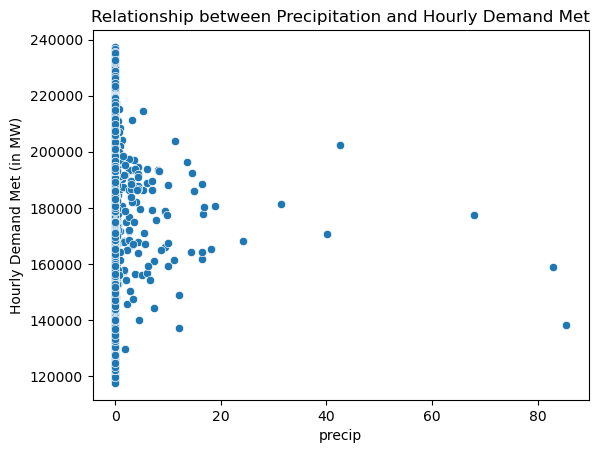

Correlation between 'precip' and 'Hourly Demand Met': -0.024079142048144375
Correlation between 'precipprob' and 'Hourly Demand Met': -0.007853565443520585


In [26]:
# Plot correlation between 'precip' and 'Hourly Demand Met'
sns.scatterplot(x=df_pruned['precip'], y=df_pruned['Hourly Demand Met (in MW)'])
plt.title("Relationship between Precipitation and Hourly Demand Met")
plt.show()

# Plot correlation between 'precipprob' and 'Hourly Demand Met'
sns.scatterplot(x=df_pruned['precipprob'], y=df_pruned['Hourly Demand Met (in MW)'])
plt.title("Relationship between Precipitation Probability and Hourly Demand Met")
plt.show()

# Calculate correlation coefficients between 'precip', 'precipprob', and the target variable
precip_corr = df_pruned[['precip', 'Hourly Demand Met (in MW)']].corr().iloc[0, 1]
precipprob_corr = df_pruned[['precipprob', 'Hourly Demand Met (in MW)']].corr().iloc[0, 1]

print(f"Correlation between 'precip' and 'Hourly Demand Met': {precip_corr}")
print(f"Correlation between 'precipprob' and 'Hourly Demand Met': {precipprob_corr}")


In [27]:
# Drop 'precip' and 'precipprob' as they have low correlation with the target
df_pruned.drop(columns=['precip', 'precipprob'], inplace=True)

In [28]:
df_pruned.head()

Hourly Demand Met (in MW)             datetime  temp   dew  humidity  \
0                  138212.80  2023-01-01 00:00:00  11.0  10.0     93.55   
1                  134620.74  2023-01-01 01:00:00  10.0   9.0     93.50   
2                  131384.79  2023-01-01 02:00:00   8.6   7.6     93.83   
3                  130602.47  2023-01-01 03:00:00  10.0   9.0     93.50   
4                  133288.97  2023-01-01 04:00:00   9.0   9.0    100.00   

   windgust  windspeed  winddir  sealevelpressure  cloudcover  visibility  \
0      13.0        5.4    250.0            1020.0         0.0         2.0   
1      13.3        5.4    250.0            1020.0         0.0         2.0   
2      13.3        0.0    282.1            1019.5         0.0         1.2   
3      13.7        0.0      0.0            1019.0         0.0         2.0   
4      12.2        5.4    270.0            1019.0         0.0         1.0   

   solarradiation  uvindex  
0             0.0        0  
1             0.0        0  
2             0.0        0  
3             0.0        0  
4             0.0        0

In [29]:
df_pruned.describe()

Hourly Demand Met (in MW)          temp           dew      humidity  \
count               11664.000000  11664.000000  11664.000000  11664.000000   
mean               181536.094420     23.674048     15.005204     64.225615   
std                 19967.405263      7.949271      6.880984     24.231019   
min                117602.110000      4.000000     -8.000000      7.400000   
25%                168523.135000     17.400000     10.000000     44.560000   
50%                184053.645000     25.000000     14.000000     66.780000   
75%                195973.955000     30.000000     20.000000     85.980000   
max                237361.970000     44.000000     30.000000    100.000000   

           windgust     windspeed       winddir  sealevelpressure  \
count  11664.000000  11664.000000  11664.000000      11664.000000   
mean      17.302263      6.761797    176.480316       1010.943570   
std        8.103169      5.098887    117.315789          6.595777   
min        1.800000      0.000000      0.000000        993.900000   
25%       11.200000      2.000000     67.000000       1005.500000   
50%       15.500000      7.200000    230.000000       1011.400000   
75%       22.300000      9.400000    271.000000       1017.000000   
max       66.600000     63.500000    360.000000       1027.000000   

         cloudcover    visibility  solarradiation       uvindex  
count  11664.000000  11664.000000    11664.000000  11664.000000  
mean      37.916041      2.635742      215.819067      2.130487  
std       35.293297      1.522155      289.945295      2.920587  
min        0.000000      0.000000        0.000000      0.000000  
25%        0.000000      2.000000        0.000000      0.000000  
50%       29.200000      2.300000        8.000000      0.000000  
75%       60.800000      4.000000      435.425000      4.000000  
max      100.000000     24.100000     1016.700000     10.000000

In [31]:
df_pruned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11664 entries, 0 to 11663
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Hourly Demand Met (in MW)  11664 non-null  float64
 1   datetime                   11664 non-null  object 
 2   temp                       11664 non-null  float64
 3   dew                        11664 non-null  float64
 4   humidity                   11664 non-null  float64
 5   windgust                   11664 non-null  float64
 6   windspeed                  11664 non-null  float64
 7   winddir                    11664 non-null  float64
 8   sealevelpressure           11664 non-null  float64
 9   cloudcover                 11664 non-null  float64
 10  visibility                 11664 non-null  float64
 11  solarradiation             11664 non-null  float64
 12  uvindex                    11664 non-null  int64  
dtypes: float64(11), int64(1), object(1)
memory usa

<div style="background-color:#eaf4ff; padding: 12px; border-radius: 8px; width: fit-content; display: inline-block;">
    
#### 5.4 Correcting datatype of 'datetime' column

</div>


In [32]:
# Convert 'datetime' column from object to datetime
df_pruned['datetime'] = pd.to_datetime(df_pruned['datetime'])

# Verify the conversion
df_pruned.dtypes

Hourly Demand Met (in MW)           float64
datetime                     datetime64[ns]
temp                                float64
dew                                 float64
humidity                            float64
windgust                            float64
windspeed                           float64
winddir                             float64
sealevelpressure                    float64
cloudcover                          float64
visibility                          float64
solarradiation                      float64
uvindex                               int64
dtype: object

In [33]:
# Compute the correlation matrix
corr_matrix = df_pruned.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='CMRmap_r', center=0, linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


<div style="background-color:#eaf4ff; padding: 12px; border-radius: 8px; width: fit-content; display: inline-block;">
    
#### 5.4 Handling Weakly Correlated features

</div>


In [36]:
# Get correlation of all features with the target
target_corr = corr_matrix['Hourly Demand Met (in MW)'].sort_values(key=abs, ascending=False)

# Display correlation with target variable
print(target_corr)

# Define a threshold for weak correlation (absolute correlation < 0.05)
weak_features = target_corr[abs(target_corr) < 0.05].index.tolist()
print("Weakly Correlated Features:", weak_features)


Hourly Demand Met (in MW)    1.000000
temp                         0.559452
solarradiation               0.479489
uvindex                      0.474061
humidity                    -0.399322
windspeed                    0.371802
sealevelpressure            -0.341987
windgust                     0.330286
visibility                   0.307781
winddir                      0.262693
dew                          0.228908
datetime                     0.096134
cloudcover                   0.066871
Name: Hourly Demand Met (in MW), dtype: float64
Weakly Correlated Features: []


All features show at least some correlation with the target. Even the lowest correlated feature (cloudcover) has a value of 0.066, which is just above the common weak threshold of 0.05. Therefore, no feature needs to be dropped at this stage 

<div style="background-color:#eaf4ff; padding: 12px; border-radius: 8px; width: fit-content; display: inline-block;">
    
#### 5.5 Handling highly skewed data

</div>


#### Identifying skewed features

Skewness of numerical features:
 visibility          4.020893
uvindex             1.037519
solarradiation      1.031427
windgust            0.958022
windspeed           0.729866
cloudcover          0.394578
dew                 0.253264
sealevelpressure   -0.207467
temp               -0.275363
humidity           -0.283576
winddir            -0.315964
dtype: float64


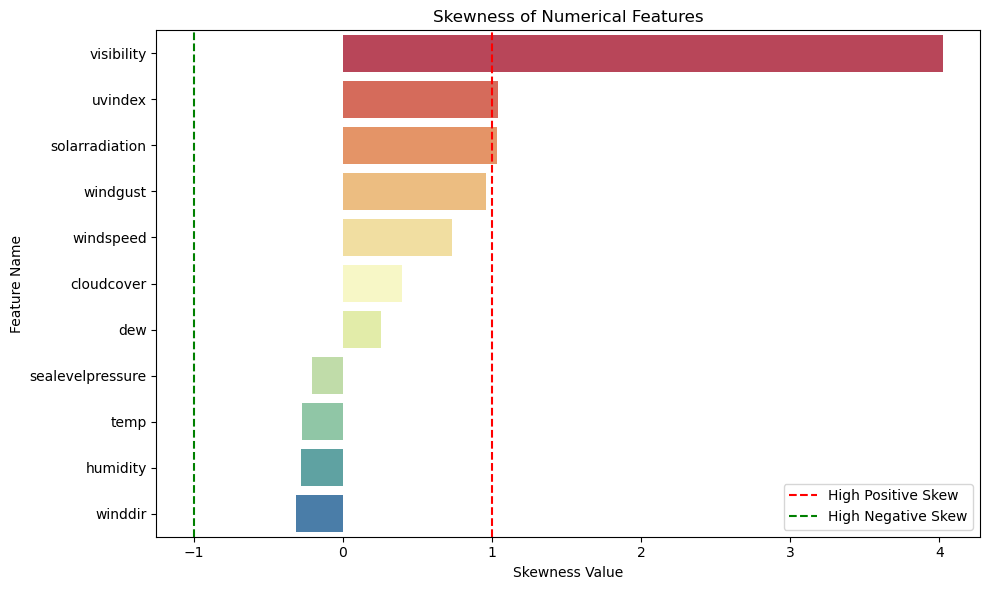

In [38]:
from scipy.stats import skew
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Drop the target variable from the list of numerical columns
numerical_cols = df_pruned.select_dtypes(include=np.number).columns.drop('Hourly Demand Met (in MW)')

# Compute skewness
skewness_values = df_pruned[numerical_cols].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)

# Display skewness
print("Skewness of numerical features:\n", skewness_values)

# Visualize the skewness
plt.figure(figsize=(10, 6))
sns.barplot(x=skewness_values.values, y=skewness_values.index, palette='Spectral')
plt.axvline(1, color='red', linestyle='--', label='High Positive Skew')
plt.axvline(-1, color='green', linestyle='--', label='High Negative Skew')
plt.title('Skewness of Numerical Features')
plt.xlabel('Skewness Value')
plt.ylabel('Feature Name')
plt.legend()
plt.tight_layout()
plt.show()


In [39]:
# Check for zeros or negative values
print("Min windgust:", df['windgust'].min())
print("Min windspeed:", df['windspeed'].min())

Min windgust: 1.8
Min windspeed: 0.0


<div style="background-color:#f9f3db; padding: 8px; border-radius: 10px;">

### The Log Transformation
</div>

Skewed distributions can distort model learning, especially for algorithms sensitive to feature distributions. Right-skewed features, which contain extreme positive values, can lead to biased model interpretations and suboptimal performance.

To normalize these distributions and **improve model generalizability**, we will apply the `log1p` (log(1 + x)) transformation on selected numerical features. This function is safe for data with zero values and is commonly used in predictive modeling to reduce skewness and stabilize variance.

The following features exhibited notable right skewness (skewness > 0.75) and will be handled using the log transformation:
- `visibility`
- `uvindex`
- `solarradiation`
- `windgust`
- `windspeed`




In [40]:
import numpy as np

# Apply log1p transformation on selected features
features_to_transform = ['visibility', 'uvindex', 'solarradiation', 'windgust', 'windspeed']

# Apply log1p (log(1 + x)) transformation to the selected features
df_pruned[features_to_transform] = df_pruned[features_to_transform].apply(np.log1p)

# Verify the transformations
df_pruned[features_to_transform].head()


visibility  uvindex  solarradiation  windgust  windspeed
0    1.098612      0.0             0.0  2.639057   1.856298
1    1.098612      0.0             0.0  2.660260   1.856298
2    0.788457      0.0             0.0  2.660260   0.000000
3    1.098612      0.0             0.0  2.687847   0.000000
4    0.693147      0.0             0.0  2.580217   1.856298

<div style="background-color:#eaf4ff; padding: 12px; border-radius: 8px; width: fit-content; display: inline-block;">
    
#### 5.7 Cyclic Encoding for Wind Direction


</div>

When working with cyclical features, such as `winddir` (wind direction), traditional encoding techniques like one-hot encoding are unsuitable. This is because values like 0° and 360° represent the same point on a circle, but one-hot encoding would treat them as entirely distinct values, leading to incorrect model behavior.

To address this, we use **cyclic encoding**, which preserves the cyclical relationship by transforming the feature into two components—**sin** and **cos**. These transformations map the circular data into two continuous dimensions, enabling machine learning models to better capture the cyclical nature.

For this dataset, we apply the following transformations:
- **sin(winddir)**: The sine of the wind direction (captures vertical component).
- **cos(winddir)**: The cosine of the wind direction (captures horizontal component).

By using these transformations, we can represent the wind direction in a way that models understand, while also maintaining the cyclical nature of the data.

In [41]:
# Cyclic Encoding for 'winddir' (Wind Direction)
df_pruned['winddir_sin'] = np.sin(np.radians(df_pruned['winddir']))
df_pruned['winddir_cos'] = np.cos(np.radians(df_pruned['winddir']))

# Drop original 'winddir' column as it is now encoded
df_pruned = df_pruned.drop(columns=['winddir'])

# Verify the changes
df_pruned[['winddir_sin', 'winddir_cos']].head()


winddir_sin   winddir_cos
0    -0.939693 -3.420201e-01
1    -0.939693 -3.420201e-01
2    -0.977783  2.096186e-01
3     0.000000  1.000000e+00
4    -1.000000 -1.836970e-16

In [42]:
df_pruned.head()

Hourly Demand Met (in MW)            datetime  temp   dew  humidity  \
0                  138212.80 2023-01-01 00:00:00  11.0  10.0     93.55   
1                  134620.74 2023-01-01 01:00:00  10.0   9.0     93.50   
2                  131384.79 2023-01-01 02:00:00   8.6   7.6     93.83   
3                  130602.47 2023-01-01 03:00:00  10.0   9.0     93.50   
4                  133288.97 2023-01-01 04:00:00   9.0   9.0    100.00   

   windgust  windspeed  sealevelpressure  cloudcover  visibility  \
0  2.639057   1.856298            1020.0         0.0    1.098612   
1  2.660260   1.856298            1020.0         0.0    1.098612   
2  2.660260   0.000000            1019.5         0.0    0.788457   
3  2.687847   0.000000            1019.0         0.0    1.098612   
4  2.580217   1.856298            1019.0         0.0    0.693147   

   solarradiation  uvindex  winddir_sin   winddir_cos  
0             0.0      0.0    -0.939693 -3.420201e-01  
1             0.0      0.0    -0.939693 -3.420201e-01  
2             0.0      0.0    -0.977783  2.096186e-01  
3             0.0      0.0     0.000000  1.000000e+00  
4             0.0      0.0    -1.000000 -1.836970e-16

In [43]:
df_pruned.describe()

Hourly Demand Met (in MW)             datetime          temp  \
count               11664.000000                11664  11664.000000   
mean               181536.094420  2023-08-31 23:30:00     23.674048   
min                117602.110000  2023-01-01 00:00:00      4.000000   
25%                168523.135000  2023-05-02 11:45:00     17.400000   
50%                184053.645000  2023-08-31 23:30:00     25.000000   
75%                195973.955000  2023-12-31 11:15:00     30.000000   
max                237361.970000  2024-04-30 23:00:00     44.000000   
std                 19967.405263                  NaN      7.949271   

                dew      humidity      windgust     windspeed  \
count  11664.000000  11664.000000  11664.000000  11664.000000   
mean      15.005204     64.225615      2.812359      1.720364   
min       -8.000000      7.400000      1.029619      0.000000   
25%       10.000000     44.560000      2.501436      1.098612   
50%       14.000000     66.780000      2.803360      2.104134   
75%       20.000000     85.980000      3.148453      2.341806   
max       30.000000    100.000000      4.213608      4.166665   
std        6.880984     24.231019      0.438763      0.940219   

       sealevelpressure    cloudcover    visibility  solarradiation  \
count      11664.000000  11664.000000  11664.000000    11664.000000   
mean        1010.943570     37.916041      1.212595        2.885927   
min          993.900000      0.000000      0.000000        0.000000   
25%         1005.500000      0.000000      1.098612        0.000000   
50%         1011.400000     29.200000      1.193922        2.197225   
75%         1017.000000     60.800000      1.609438        6.078617   
max         1027.000000    100.000000      3.222868        6.925300   
std            6.595777     35.293297      0.406922        2.919065   

            uvindex   winddir_sin   winddir_cos  
count  11664.000000  11664.000000  11664.000000  
mean       0.726205     -0.241670      0.194865  
min        0.000000     -1.000000     -1.000000  
25%        0.000000     -0.939693     -0.342020  
50%        0.000000     -0.469472      0.173648  
75%        1.609438      0.342020      0.829038  
max        2.397895      1.000000      1.000000  
std        0.887306      0.723279      0.616902

<div style="background-color:#eaf4ff; padding: 12px; border-radius: 8px; width: fit-content; display: inline-block;">
    
#### 5.8 Handling Outliers in Numerical Features

</div>

Outliers are extreme values that deviate significantly from the majority of the data. They can adversely affect the performance of machine learning models, especially those sensitive to data distribution (like linear models). 

To maintain model accuracy and **improve generalization**, we use the **IQR (Interquartile Range) method** to detect and handle outliers. This method identifies values that lie significantly outside the range of most data points ($ Q1 - 1.5 \times \text{IQR} $ and $ Q3 + 1.5 \times \text{IQR} $).

#### Steps for Outlier Handling:
1. Calculate the **IQR** for each numerical feature.
2. Identify the **upper** and **lower bounds** for each feature.
3. **Remove or cap** values beyond the bounds, depending on the chosen approach.

#### Formulae for Outlier Detection Using IQR

<div style="background-color:#f9f3db; padding: 20px; border-radius: 10px;">

To detect outliers using the **Interquartile Range (IQR)**, the following formulae are used:

1. **Calculate the IQR** for each feature:
   - $ \text{IQR} = Q3 - Q1 $
     - Where:
       - $ Q1 $ = 25th percentile (lower quartile)
       - $ Q3 $ = 75th percentile (upper quartile)

2. **Identify the lower and upper bounds** for outliers:
   - **Lower bound**: $ Q1 - 1.5 \times \text{IQR} $
   - **Upper bound**: $ Q3 + 1.5 \times \text{IQR} $

3. **Outliers** are defined as data points that fall beyond these bounds:
   - If a value is **lower than the lower bound** ($ \text{value} < Q1 - 1.5 \times \text{IQR} $) or **greater than the upper bound** ($ \text{value} > Q3 + 1.5 \times \text{IQR} $), it is considered an outlier.

4. **Handling the outliers**:
   - **Remove**: Simply drop the rows with outlier values.
   - **Cap (clip)**: Replace outlier values with the nearest acceptable value within the bounds.

</div>

By handling outliers, we aim to make our features more stable and predictable for modeling.

In [45]:
import numpy as np

# Function to detect and handle outliers using IQR
def handle_outliers(df):
    # List of numerical features to check for outliers
    numerical_features = df_pruned.select_dtypes(include=[np.number]).columns
    
    for feature in numerical_features:
        # Calculate the IQR for each feature
        Q1 = df_pruned[feature].quantile(0.25)
        Q3 = df_pruned[feature].quantile(0.75)
        IQR = Q3 - Q1
        
        # Define lower and upper bounds for outlier detection
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Identify outliers
        outliers = df_pruned[(df_pruned[feature] < lower_bound) | (df_pruned[feature] > upper_bound)]
        
        # Option to remove outliers or cap them (clipping)
        # Here we'll clip the outliers
        df_pruned[feature] = np.clip(df_pruned[feature], lower_bound, upper_bound)
        
        # Optionally, you can remove outliers instead of clipping
        # df_pruned = df+pruned[(df_pruned[feature] >= lower_bound) & (df_pruned[feature] <= upper_bound)]
    
    return df

# Apply the function to handle outliers
df_cleaned = handle_outliers(df_pruned.copy())

# Check if outliers were removed or clipped
df_cleaned.describe()


Hourly Demand Met (in MW)             datetime          temp  \
count               11664.000000                11664  11664.000000   
mean               181547.167110  2023-08-31 23:30:00     23.674048   
min                127346.905000  2023-01-01 00:00:00      4.000000   
25%                168523.135000  2023-05-02 11:45:00     17.400000   
50%                184053.645000  2023-08-31 23:30:00     25.000000   
75%                195973.955000  2023-12-31 11:15:00     30.000000   
max                237150.185000  2024-04-30 23:00:00     44.000000   
std                 19935.766511                  NaN      7.949271   

                dew      humidity      windgust     windspeed  \
count  11664.000000  11664.000000  11664.000000  11664.000000   
mean      15.005633     64.225615      2.812798      1.720364   
min       -5.000000      7.400000      1.530910      0.000000   
25%       10.000000     44.560000      2.501436      1.098612   
50%       14.000000     66.780000      2.803360      2.104134   
75%       20.000000     85.980000      3.148453      2.341806   
max       30.000000    100.000000      4.118979      4.166665   
std        6.879669     24.231019      0.437258      0.940219   

       sealevelpressure    cloudcover    visibility  solarradiation  \
count      11664.000000  11664.000000  11664.000000    11664.000000   
mean        1010.943570     37.916041      1.221331        2.885927   
min          993.900000      0.000000      0.332374        0.000000   
25%         1005.500000      0.000000      1.098612        0.000000   
50%         1011.400000     29.200000      1.193922        2.197225   
75%         1017.000000     60.800000      1.609438        6.078617   
max         1027.000000    100.000000      2.375676        6.925300   
std            6.595777     35.293297      0.375669        2.919065   

            uvindex   winddir_sin   winddir_cos  
count  11664.000000  11664.000000  11664.000000  
mean       0.726205     -0.241670      0.194865  
min        0.000000     -1.000000     -1.000000  
25%        0.000000     -0.939693     -0.342020  
50%        0.000000     -0.469472      0.173648  
75%        1.609438      0.342020      0.829038  
max        2.397895      1.000000      1.000000  
std        0.887306      0.723279      0.616902

<div style="background-color:#eaf4ff; padding: 12px; border-radius: 8px; width: fit-content; display: inline-block;">
    
#### 5.9 Feature Scaling

</div>

#### Feature Scaling for Tree-Based Models (XGBoost and Random Forest)

Tree-based models like **Random Forest** and **XGBoost** do not require feature scaling because they are based on the **relative order** of features, not their absolute values. These models create splits based on thresholds (e.g., "Is temperature > 20?") rather than considering the magnitude of feature values.

#### Conclusion:
- **Scaling is unnecessary** for **Random Forest** and **XGBoost**.
- Scaling won’t hurt, but it typically **doesn’t improve performance** either.


In [46]:
# Save the cleaned DataFrame to a CSV file
df_cleaned.to_csv('cleaned_data.csv', index=False)